<h1 style="color:navy">Анализ бизнес-показателей</h1>


1. [Подготовка данных](#Подготовка-данных)
2. [Функции для расчетов и визуализации](#Функции-для-расчёта-метрик-и-визуализации)
3. [Исследовательский анализ данных](#Исследовательский-анализ-данныхх)
4. [Маркетинг](#Маркетинг)
5. [Анализ окупаемости](#Оценка-окупаемости)
6. [Общие выводы и рекомендации](#Общие-выводы)

<font color='navy' size=4>**Описание проекта**</font>

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

<font color='navy' size=4>**Цели проекта**</font>

- Научиться правильно рассчитывать, визуализировать и интерпретировать бизнес-показатели;
- По имеющимся данным определить причину убытков компании;
- Сформулировать рекомендации маркетологам для увеличения окупаемости рекламы.

<font color='navy' size=4>**Ход исследования**</font>

1. Загрузить и изучить данные, подготовить их к анализу.
2. Определить функции для расчета и визуализации метрик.
3. Составить профили пользователей и проанализировать их.
4. Провести анализ расходов на рекламу.
5. Оценить окупаемость рекламы, найти причины убытков.
6. Сделать вывод и сформировать рекомендации.

<h2 style="color:navy">Подготовка данных</h2> 

### Загрузка данных

Файлы: 
[Визиты](https://code.s3.yandex.net/datasets/visits_info_short.csv "скачать файл visits_info_short.csv"),
[Заказы](https://code.s3.yandex.net/datasets/orders_info_short.csv "скачать файл orders_info_short.csv"),
[Расходы](https://code.s3.yandex.net/datasets/costs_info_short.csv "скачать файл costs_info_short.csv")

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import string

In [2]:
# Загрузка файлов
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs  = pd.read_csv('/datasets/costs_info_short.csv')
except:
    try:
        visits = pd.read_csv('visits_info_short.csv')
        orders = pd.read_csv('orders_info_short.csv')
        costs  = pd.read_csv('costs_info_short.csv')
    except: 
        visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
        orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
        costs  = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv') 

### Информация о визитах на сайт

Изучим таблицу `visits` из файла `visits_info_short.csv` 

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
# переведём имена столбцов в нижний регистр и заменим пробелы на знак подчёркивания
visits.columns=visits.columns.str.lower().str.replace(' ', '_')

# изменим тип данных для столбцов с датами
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [5]:
print('Даты посещения сайта:')
print('c\033[1m', visits['session_start'].dt.date.min(), 
      '\033[0mпо\033[1m', visits['session_start'].dt.date.max(), '\033[0m')

print('Количество дубликатов\033[1m', 
      visits.duplicated().sum(), '\033[0m')
print('Уникальные значения \033[1m region \033[0m:', end=' ')
print(*sorted(visits['region'].unique()), sep=',  ')
print('Уникальные значения \033[1m device \033[0m:', end=' ')
print(*sorted(visits['device'].unique()), sep=',  ')
print('Уникальные значения \033[1m channel \033[0m:')
print(*sorted(visits['channel'].unique()), sep=',  ')

Даты посещения сайта:
c 2019-05-01 по 2019-10-31 
Количество дубликатов 0 
Уникальные значения  region : France,  Germany,  UK,  United States
Уникальные значения  device : Android,  Mac,  PC,  iPhone
Уникальные значения  channel :
AdNonSense,  FaceBoom,  LeapBob,  MediaTornado,  OppleCreativeMedia,  RocketSuperAds,  TipTop,  WahooNetBanner,  YRabbit,  lambdaMediaAds,  organic


In [6]:
# заменим "United States" на "USA"
visits['region'] = visits['region'].mask(visits['region']=='United States', 'USA')

# в ходе исследования нам могут понадобиться и другая информация

# длительность сессии в секундах и в минутах (для удобства)
visits['sess_seconds'] = (visits['session_end'] - visits['session_start']).dt.seconds
visits['sess_minutes'] = round(visits['sess_seconds'] / 60, 2)
# номера месяца и недели и датаsession_start
visits['month'] = visits['session_start'].dt.month
visits['week'] = visits['session_start'].dt.isocalendar().week
visits['session_date'] = visits['session_start'].dt.date

# удалим столбец с окончанием сессии, он уже вряд ли пригодится
visits=visits.drop(columns=['session_end'])

# проверим что получилось
display(visits.sample(5))

,user_id,region,device,channel,session_start,sess_seconds,sess_minutes,month,week,session_date
259704,920450825450,France,iPhone,LeapBob,2019-08-11 20:00:41,8057,134.28,8,32,2019-08-11
158400,306974188651,USA,Mac,organic,2019-09-25 17:55:41,3116,51.93,9,39,2019-09-25
132095,742883824695,USA,iPhone,organic,2019-09-03 18:27:56,1600,26.67,9,36,2019-09-03
275991,48463627033,UK,Android,organic,2019-09-08 19:05:49,786,13.10,9,36,2019-09-08
309413,119403565704,UK,Mac,organic,2019-10-29 14:42:49,2110,35.17,10,44,2019-10-29


Теперь датафрейм `visits` хранит лог сервера с информацией о посещениях сайта:
- `user_id` — уникальный идентификатор пользователя,
- `region` — страна пользователя,
- `device` — тип устройства пользователя,
- `channel` — идентификатор источника перехода,
- `session_start` — дата и время начала сессии,
- `sess_seconds` - длина сессии в секундах,
- `sess_minutes` - длина сессии в минутах,
- `month` - номер месяца,
- `week` - номер недели,
- `session_date` - дата

### Заказы

Изучим таблицу `orders` из файла `orders_info_short.csv` 

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
# переведём имена столбцов в нижний регистр и заменим пробелы на знак подчёркивания
orders.columns=orders.columns.str.lower().str.replace(' ', '_')

# изменим тип данных для даты заказа
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

# проверим что получилось
display(orders.dtypes.to_frame().style)
display(orders.sample(5))

,0
user_id,int64
event_dt,datetime64[ns]
revenue,float64


,user_id,event_dt,revenue
32814,252992220413,2019-08-11 07:20:51,4.99
8661,326462092102,2019-07-20 11:10:12,4.99
31638,46387821615,2019-07-24 09:12:52,4.99
14542,678936610986,2019-08-27 17:26:48,4.99
38218,694693736493,2019-10-12 13:22:13,4.99


Датафрейм `orders` с информацией о заказах:
- `user_id` — уникальный идентификатор пользователя,
- `event_dt` — дата и время покупки,
- `revenue` — сумма заказа.

In [9]:
print('Количество дубликатов:\033[1m', 
      orders.duplicated().sum(), '\033[0m')

print('Данные о заказах собраны за период:')
print('c\033[1m', orders['event_dt'].dt.date.min(), 
      '\033[0mпо\033[1m', orders['event_dt'].dt.date.max(), '\033[0m')

Количество дубликатов: 0 
Данные о заказах собраны за период:
c 2019-05-01 по 2019-10-31 


In [10]:
# проверка на аномальные значения
display(orders['revenue'].value_counts().reset_index()
        .rename(columns={'revenue':'count', 'index':'revenue'})
        .sort_values(by='revenue')
        .style.format('{:0.4}', subset='revenue')
        .set_caption('Количество счетов на определенную сумму'))

,revenue,count
0,4.99,38631
1,5.99,780
2,9.99,385
4,19.99,204
3,49.99,212


Подавляющее большинство счетов составляет минимально возможную сумму 4.99 доллара. Интересно, клиенты платят один раз за постоянный доступ или это единоразовая оплата за какой-то определенный "контент". А может, это плата за месяц. 

В итоге, аномальных и пропущенных значений в таблице мы не нашли. 

### Расходы на рекламу
Изучим файл таблицу `costs` из файла `costs_info_short.csv` 

In [11]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [12]:
# переименуем столбцы
costs.columns=costs.columns.str.lower()

# изменим тип данных для даты заказа
costs['dt'] = pd.to_datetime(costs['dt'])

print('Количество дубликатов:\033[1m', 
      costs.duplicated().sum(), '\033[0m')
print('Уникальные значения \033[1m channel \033[0m:')
print(*sorted(costs['channel'].unique()), sep=',  ')

# добавим в таблицу costs столбцы с номерами месяца и недели
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week
costs['date'] = costs['dt'].dt.date

print('Данные о расходах на рекламу за период:')
print('c\033[1m', costs['date'].min(), 
      '\033[0mпо\033[1m', costs['date'].max(), '\033[0m')

# проверим что получилось
display(costs.sample(5))

Количество дубликатов: 0 
Уникальные значения  channel :
AdNonSense,  FaceBoom,  LeapBob,  MediaTornado,  OppleCreativeMedia,  RocketSuperAds,  TipTop,  WahooNetBanner,  YRabbit,  lambdaMediaAds
Данные о расходах на рекламу за период:
c 2019-05-01 по 2019-10-27 


,dt,channel,costs,month,week,date
771,2019-06-21,YRabbit,3.60,6,25,2019-06-21
596,2019-06-26,TipTop,338.00,6,26,2019-06-26
1190,2019-08-19,LeapBob,9.45,8,34,2019-08-19
1744,2019-09-02,lambdaMediaAds,10.40,9,36,2019-09-02
813,2019-08-02,YRabbit,4.20,8,31,2019-08-02


Датафрейм `costs` содержит информацию о расходах на рекламу:
- `dt` — дата проведения рекламной кампании,
- `channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию,
- `month` - номер месяца,
- `week` - номер недели,
- `date` - дата

Проверим, нет ли аномальных значений цен

,mean,min,25%,50%,75%,max
costs,58.61,0.8,6.495,12.29,33.6,630.0


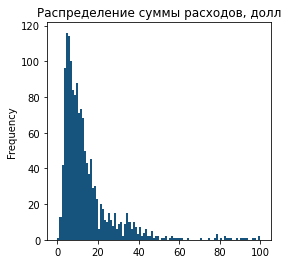

In [37]:
display(costs['costs'].describe().to_frame()
        .query('~(index.isin(["count","std"]))').T.style.format('{:0.4}')
        .set_caption('Сумма расходов на рекламу, долл.'))

costs['costs'].plot.hist(bins=100, range=(0,100), figsize=(4,4),
                color='#16537d', title='Распределение суммы расходов, долл')
plt.show();

Основная часть счетов за рекламные кампании составляет от 6 до 34 долларов. Есть аномально высокие суммы за один счёт. Посмотрим на те счета, которые могут портить всю картину.

In [14]:
display(costs.sort_values(by='costs', ascending=False).head(10))

,dt,channel,costs,month,week,date
695,2019-10-03,TipTop,630.0,10,40,2019-10-03
690,2019-09-28,TipTop,623.0,9,39,2019-09-28
684,2019-09-22,TipTop,616.0,9,38,2019-09-22
691,2019-09-29,TipTop,605.5,9,39,2019-09-29
689,2019-09-27,TipTop,602.0,9,39,2019-09-27
719,2019-10-27,TipTop,588.0,10,43,2019-10-27
685,2019-09-23,TipTop,570.5,9,39,2019-09-23
698,2019-10-06,TipTop,563.5,10,40,2019-10-06
718,2019-10-26,TipTop,563.5,10,43,2019-10-26
686,2019-09-24,TipTop,556.5,9,39,2019-09-24


Какой-то прожорливый TipTop. Думаю, мы его еще встретим дальше. Цены, конечно, аномальные для такого распределения, но не похожи на ошибку в данных.

### Перечень используемых переменных

In [15]:
# зададим момент, горизонт анализа и ширину окна сглаживания
horizon=14
moment=datetime(2019, 10, 27).date()
window=14

# сохраним названия каналов в таблицу `channel_list`
channel_list = visits['channel'].unique()

# создадим цветовые гаммы
colors_list = ['#cf2c2c', '#16537d', '#d48281', '#7794a3', '#f29e00', '#61cc64', 
               '#2b8524', '#e83873', '#3374c0', '#fdc800', '#4e9dfc']
colors_short= ['#cf2c2c', '#16537d', '#f29e00', '#2b8524']
colors_dict = dict(zip(channel_list, colors_list))

Имена таблиц, которые использовались в проекте:

- `profiles` - глобальная переменная со всей собранной информацией по каждому пользователю;
- `reg_profile` - количество уникальных пользователей и количество плательщиков, по регионам, каналам и устройствам, на основе этой таблицы были собраны небольшие с количеством и долями разных пользователей:
    - `users_organic`
    - `users_region`
    - `users_devices`
    - `users_channels`
- `costs_per_channel` - сумма расходов на каждый источник
- `costs_history` - динамика расходов по всем источникам
- `monty_income` - суммы доходов от привлечения клиентов и расходов на рекламу по каждому месяцу
- `revenue_per_channel` - количество заказов и сумма доходов в разбивке по каналам привлечения
- `df_grouped, df_history` - таблицы с рассчитанными метриками для построения графиков

<h2 style="color:navy">Функции для расчёта метрик и визуализации</h2> 


### Профили пользователей и CAC

Для создания таблицы с информацией о пользователях, воспользуемя функцией из учебного курса. Преобразуем её следующим образом:
- не будем передавать датафреймы в качестве параметров, используем внутри функции загруженные таблицы;
- функция не будет возращать датафрейм, а просто сохранит его в глобальную переменную;
- в нашем проекте информация о действиях пользователя содержит только данные о заказе (покупке) на сайте. Таким образом, группировать профили пользователей по событиям нет необходимости (исключим таблицу events, которая использовалась в учебном курсе). 

Создадим функцию `get_profiles()`, которая сохранит в таблицу `profiles` следующую информацию:
- `user_id` - идентификатор клиента
- `first_dt` - время первого посещения сайта в формате datetime
- `channel` - источник первого посещения сайта
- `device` - тип устройства первого посещения
- `region` - регион первого посещения
- `date` - дата первого посещения сайта 
- `payer` - принимает значение True, если клиент сделал хотя бы один заказ на сайте и False, если клиент не принёс дохода
- `sess_times` - суммарное время проведенное на сайте (в минутах
- `dates_count` - количество дней, когда клиент заходил на сайт
- `cac` - Метрика САС - стоимость привлечения клиента
- `pays_count` - количество оплаченных заказов
- `payments` - сумма всех заказов

In [16]:
# Функция для создания таблицы профилей пользователей приложения и расчёта САС для одного пользователя

def get_profiles():
    
    # объявим profiles в качестве глобальной переменной
    global profiles;
       
    # группируем и создадим таблицу первых посещений сайта клиентами
    profiles = (visits.sort_values(by=['user_id', 'session_start']).groupby('user_id')
            .agg({'session_start': 'first', 
                  'channel': 'first', 
                  'device': 'first', 
                  'region': 'first'})
            .rename(columns={'session_start': 'first_dt'}).reset_index())

    # добавим столбцы :
    
    # с указанием времени даты
    profiles['date'] = profiles['first_dt'].dt.date
    # признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # суммарное количество минут проведенное на сайте
    profiles = profiles.merge(visits.groupby('user_id')['sess_minutes'].sum(),
              on='user_id', how='left').rename(columns={'sess_minutes': 'sess_times'})
    
    # рассчитаем столбец с количеством дней на сайте
    profiles = profiles.merge(visits.groupby('user_id')['session_date'].nunique(),
                on='user_id', how='left').rename(columns={'session_date': 'dates_count'})
    
    # рассчитываем САС из таблицы costs
    # считаем количество уникальных пользователей c одинаковыми источником и датой привлечения
    users = (profiles.groupby(['date', 'channel']).agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'unique_users'}).reset_index())
    
    # объединяем траты на рекламу и число привлечённых пользователей
    users = costs.merge(users, on=['date', 'channel'], how='left')
    # делим рекламные расходы на число привлечённых пользователей
    users['cac'] = users['costs'] / users['unique_users']
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(users[['date', 'channel', 'cac']], 
                              on=['date', 'channel'], how='left')
    # стоимость привлечения органических пользователей равна нулю
    profiles['cac'] = profiles['cac'].fillna(0)
    
    # найдем доход от каждого клиента
    orders_count = orders.groupby('user_id').agg({'event_dt': 'count', 
                'revenue': 'sum'}).sort_values(by='event_dt', ascending=False)
    orders_count.columns = ['orders_count', 'revenue_per_user']
    profiles = profiles.merge(orders_count, on='user_id', how='left') 
    # заполним нулями для тех, кто не платил
    profiles = profiles.fillna(0)
    return
    
# запустим сразу, чтобы определились профили пользователей
get_profiles()
# display(profiles.sample(5))

### Функция для расчета всех метрик


#### Описание

В учебном курсе были созданы функции для расчёта метрик:
- Retention Rate (RR) - удержание пользователя, 
- Conversion Rate (CR) - конверсии,  
- LTV - пожизненная ценность клиента, 
- ROI - возврат на инвестиции.

Все эти функции очень похожи по структуре, попробуем их объединить, чтобы не повторять похожий код несколько раз. 
Поступим так:
- не будем передавать в качестве параметров датафреймы, используем для этого загруженные таблицы и созданную таблицу профилей пользователей из основной части кода;
- не будем возвращать сырые данные;
- общие части функций объединим в одну, а те строки, которые отличаются в зависимости от метрики будем выбирать с помощью условного оператора.

Функция `business_metrics()` будет принимать следующие параметры:
- `metric` - обязательный параметр, название метрики - одно из четырёх значений: RR, CR, LTV или ROI
- `prof` - таблица с профилями пользователей, по умолчанию используется уже готовая таблица profiles
- `horizon` - количество дней - горизонт анализа;
- `obs_date` - дата - момент анализа;
- `dimensions` - список с названиями столбцов, по которым нужно сгруппировать данные для сравнения разных групп клиентов. По умолчанию список пустой:
    - если столбцы для группировки не указаны, то для всех метрик (кроме удержания) группировка не осуществляется, рассчитываются общие значения,
    - удержание всегда группируется по полю 'payer', которое указывает является ли клиент покупатем. Если список для группировки не пуст, то группировка будет осуществляться по нескольким столбцам, в том числе по 'payer'.

Функция возвращает два датафрейма:
1. Таблица с заданными метриками и группировкой (для таких таблиц будем использовать в названии `_grouped`)
2. Динамика метрики в зависимости от даты и лайфтайма (для таких таблиц будем использовать в названии `_history`). 

#### Функция business_metrics()

In [17]:
# функция для расчёта удержания, конверсии, LTV и ROI

def business_metrics(metric, horizon=horizon, obs_date=moment, 
                     dimensions=[], prof=pd.DataFrame()):
    
    # если аргумент prof не передавался, то используем 
    # профили из основной программы
    if len(prof) == 0:
        prof = profiles
    
    # проверим правильность указанного названия метрики
    if metric not in ['RR', 'CR', 'LTV', 'ROI']:
        print('Неверно указано значение метрики. Возможные значения: RR, CR, LTV, ROI')
        return 0, 0
    
    # исключаем из таблицы профилей пользователей, не «доживших» до горизонта анализа
    # сырые данные будем собирать в таблицу result_raw
    last_date = obs_date - timedelta(days=horizon-1)
    result_raw = prof.query('date <= @last_date')
    
    # для разных метрик соединим с профилями разные таблицы:
    
    if metric == 'RR':
        # соединим профили клиентов и даты визитов
        result_raw = result_raw.merge(visits[['user_id', 'session_start']], 
                                      on='user_id', how='left')
        # найдём лайфтайм - количество дней с момента первого посещения до текущей сессии
        result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_dt']).dt.days
    
    elif metric == 'CR':
        # определяем дату и время первой покупки для каждого пользователя
        first_orders = (orders.sort_values(by=['user_id', 'event_dt'])
                        .groupby('user_id').agg({'event_dt': 'first'})
                        .reset_index())
        # соединим профили клиентов и даты первой покупки
        result_raw = result_raw.merge(first_orders[['user_id', 'event_dt']], 
                                      on='user_id', how='left')
        # найдём лайфтайм - количество дней с момента первого визита до первой покупки
        result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_dt']).dt.days
        
    else:
        # для LTV и ROI соединим профили клиентов, даты и суммы покупок
        result_raw = result_raw.merge(orders[['user_id', 'event_dt', 'revenue']], 
                                      on='user_id', how='left')
        # найдём лайфтайм - количество дней с момента первого визита до каждой покупки
        result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_dt']).dt.days
    
    # сырые данные готовы, можно их сгруппировать и рассчитать метрики
    # добавляем столбец payer в список группировки для удержания (RR)
    if metric == 'RR':         
        dimensions = ['payer'] + dimensions
    # добавим в таблицу сырых данных столбец 'cohort' с одинаковыми значениями
    # если список группировки пуст, то будем группировать по cohort
    if len(dimensions)==0:
        result_raw['cohort'] = 'All users'
    
    
    # определение функции для группировки по заданным признакам и расчёту метрик
    def group_and_calc(dims):
        '''
        функция возвращает датафрейм, сгруппированный по dims, 
        в качестве dims передается список dimensions
        dims может быть изменён внутри этой функции, при этом dimensions не меняется
        остальные данные будем использовать из тела функции business_metrics,
        не передавая их в качестве параметров
        '''
        # если в dims ничего нет - будем группировать по cohort
        if len(dims) == 0:
            dims = ['cohort']
            
        # создадим сводную таблицу, сгруппированную по dims 
        # и рассчитываем значения в зависимости от метрики
        if metric in ['RR', 'CR']:
            # для удержания и конверсии считаем уникальных клиентов,
            result = result_raw.pivot_table(index=dims, columns='lifetime', 
                                            values='user_id', aggfunc='nunique')
        else:
            # для LTV и ROI строим «треугольную» таблицу выручки
            result = result_raw.pivot_table(index=dims, columns='lifetime', 
                                            values='revenue', aggfunc='sum')
        
        # приведем к целочисленному значению названия столбцов
        result.columns = result.columns.astype('int')
        # оставим в таблице только лайфтайм в пределах горизонта анализа        
        result = result[list(range(horizon))]

        # для всех метрик, кроме удержания рассчитываем данные с накоплением:
        # для конверсии - накопленное количество пользователей
        # для LTV и ROI - накопленную выручку
        if metric == 'RR':
            result = result.fillna(0)
        else:
            result = result.fillna(0).cumsum(axis=1)
        
        # рассчитаем размеры когорт из сырых данных
        cohort_sizes = (result_raw.groupby(dims).agg({'user_id': 'nunique'})
                        .rename(columns={'user_id': 'cohort_size'}))
        # добавим размеры когорт в таблицу
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # для таблиц LTV и ROI добавим столбец САС
        if metric in ['LTV', 'ROI']:
            # из сырых данных соберем таблицу cac, куда включим
            # пользователей, сас для одного пользователя, столбцы для группировки, удалим дубликаты
            cac = result_raw[['user_id', 'cac'] + dims].drop_duplicates()
            # считаем среднюю стоимость привлечения клиента по группам
            cac = cac.groupby(dims).agg({'cac': 'mean'})
            # добавляем в таблицу столбец сас после размеров когорт
            result.insert(1, 'cac', cac['cac'])
        
        # разделим значения в столбцах с лайфтаймом на размеры когорт
        result.loc[:, 0:] = result.loc[:, 0:].div(result['cohort_size'], axis=0)
        # рассчитаем ROI
        if metric == 'ROI':
            # удаляем строки где САС=0 и ROI не определено
            result = result.query('cac!=0')
            # в таблице сейчас данные LTV, разделим их на САС
            result.loc[:, 0:] = result.loc[:, 0:].div(result['cac'], axis=0)
            
        # добавим "имя" таблице (оно будет использовано в функции визуализации)
        result.columns.name = metric
        return result
    
    # возвращаем две таблицы: первая - со значениями метрики,
    # вторая - с динамикой, сгруппированная по заданному списку и когортам (дате первого посещения)
    return group_and_calc(dimensions), group_and_calc(dimensions + ['date'])

'''
# код для проверки:
get_profiles()
df_grouped, df_history = business_metrics('LTV')
display(df_grouped)
''';

### Функции для построения графиков

#### Сглаживание графиков

Используем функцию из учебного курса. Добавим в неё код, который каждый раз используется для группировки данных для последующего сглаживания. Параметы функции `smoothing()` указаны в её описании в коде

In [18]:
# функция для сглаживания фрейма
def smoothing(df, window, ind, val, dims):
    '''
    df - датафрейм, 
    window -  ширина окна сглаживания целое число, 
    ind - название столбца группировки (будет по оси х на графике), 
    val - название столбца значений (ось у), 
    dims - название столбца группировки (по каждому будет отдельная линия графика), 
    вовзращает датафрейм сглаженных данных для построения линейного графика
    '''
    # группируем данные по столбцу индексов
    df = df.pivot_table(index=ind, columns=dims, values=val, aggfunc='mean')
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Визуализация региональных отличий

Для страны, указанной в качестве аргумента строит три графика:
- круговую диаграмму по количеству устройств
- столбчатую диаграмму по количеству пользователей привлеченных с каждого канала
- такую же диаграмму для пользователей, которые оплатили хотя бы один заказ

In [19]:
# создадим функцию, чтобы нарисовать портрет
def reg_plot(reg):
    '''
    reg - название региона
    функция использует готовую таблицу reg_profile с данными по регионам
    '''
    
    # сделаем нужный срез
    if reg == '':
        df = reg_profile
        reg = 'Все страны'
    else:
        df = reg_profile.query('region==@reg')
    
    fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,5), 
                           gridspec_kw={'width_ratios': [1, 2,2]})
    
    # 1) круговая диаграмма по устройствам
    df0 = df.groupby('device')['users'].sum()
    expl = [0.05]*len(df0)
    df0.plot.pie(ax=ax[0], autopct='%1.1f%%', legend=False, 
             explode=expl, colors=colors_short, ylabel='', 
             title='Типы устройств')
    
    # 2) столбчатая диаграмма по источникам привлечения всех пользователей
    df0 = df.groupby('channel')['users'].sum().sort_values()
    # создадим для этой диаграммы список цветов
    plot_colors = list(colors_dict.get(x, 'gray') for x in df0.index)
    df0.plot.barh(legend=False, ax=ax[1], grid=True, xlabel='', color=plot_colors,
                   title='Каналы привлечения')
    
    # 3) столбчатая диаграмма по источникам привлечения платящих пользователей
    df0 = df.groupby('channel')['payers'].sum().sort_values()
    # создадим для этой диаграммы список цветов
    plot_colors = list(colors_dict.get(x, 'gray') for x in df0.index)
    df0.plot.barh(legend=False, ax=ax[2], grid=True, xlabel='', color=plot_colors,
                   title='Платящие пользователи по каналам привлечения')
    
    plt.suptitle(reg + '.  Количество пользователей')
    plt.subplots_adjust(wspace=0.2)
    plt.tight_layout(h_pad=2)
    plt.show();
    return

#### Визуализация удержания

Возьмем за основу функцию учебного курса.

Функция `rr_plot()` принимает в качестве аргументов параметры:
- таблицу удержания;
- таблицу динамики удержания;
- `horizon` - лайфтайм (целое число), для которого будут построены отдельные графики;
- `window` - ширина окна сглаживания;
- `title` - заголовок для графика, по умолчанию график будет без общего заголовка

In [20]:
# функция для визуализации удержания

def rr_plot(rr_grouped, rr_history, horizon=horizon, window=window, title=''):
    '''
    Если данные сгруппированы только по payer, то построим только два графика удержания и динамики. 
    На каждом графике будет две линии для платящих и не платящих пользователей.
    Если группировка проводилась нескольким столбцам, то графиков будет 4. Сверху - графики удержания, 
    внизу - динамика удержания. Слева - графики для платящих клиентов, справа - для неплатящих.
    '''
    # из таблицы удержания удалим столбцы с размерами когорт
    rr_grouped = rr_grouped.drop(columns=['cohort_size', 0])
    # в таблице с динамикой оставим только столбцец с лайфтаймом horizon
    rr_history = rr_history[[horizon-1]]
    
    # если в индексах таблицы удержания только payer,
    if rr_grouped.index.nlevels == 1:
        # задаём сетку для графиков
        fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 5))
                        
        # 1) кривые удержания
        rr_grouped.query('payer==True').T.plot(grid=True, ax=ax[0], 
                            color=colors_list[0], linewidth=2)
        rr_grouped.query('payer==False').T.plot(grid=True, ax=ax[0], 
                            color=colors_list[1], linewidth=2,
                        xlabel='Лайфтайм', title='Удержание пользователей')
        ax[0].legend(labels=['платящие', 'неплатящие'])
                
        # 2) динамика удержания на день horizon
        # сгладим данные
        rr_history = smoothing(rr_history, window, 'date', horizon-1, 'payer')
        # построим две линии графика
        rr_history[True].plot(grid=True, ax=ax[1],  color=colors_list[0], linewidth=2)
        rr_history[False].plot(grid=True, ax=ax[1],  
                        color=colors_list[1], linewidth=2, 
                        xlabel='Дата привлечения', 
                        title='Динамика удержания пользователей на {}-й день'.format(horizon))
        ax[1].legend(labels=['платящие', 'неплатящие'])
   
    else:
        # определим, по каким столбцам были сгруппированы данные
        dimensions = [name for name in rr_grouped.index.names
                           if name not in ['date', 'payer']]
        # задаем одинаковые цвета по словарю
        if 'channel' in dimensions:
            plot_colors = list(colors_dict.get(x, 'gray') for x in rr_grouped.droplevel('payer').index)
        else:
            plot_colors = colors_short
                       
        # задаём размер сетки для графиков
        fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(15, 10))
                
        # 1) кривые удержания платящих пользователей
        rr_grouped.query('payer == True').droplevel('payer').T.plot(
                    grid=True, ax=ax[0,0], color = plot_colors, 
                    linewidth=2, legend=None, 
                    xlabel='Лайфтайм', title='Удержание платящих пользователей')
        
        # 2) кривые удержания неплатящих пользователей
        rr_grouped.query('payer == False').droplevel('payer').T.plot(
                        grid=True, ax=ax[0,1], color = plot_colors, 
                        linewidth=2, legend=None, 
                        xlabel='Лайфтайм', title='Удержание неплатящих пользователей')
                 
        # 3) динамика удержания платящих
        # выберем платящих пользователей
        retention_filter = rr_history.query('payer==True')
        # сгладим данные
        retention_filter = smoothing(retention_filter, window, 'date', horizon-1, dimensions)
        # строим график
        retention_filter.plot(grid=True, ax=ax[1,0], color = plot_colors, 
                linewidth=2, legend=None, 
                xlabel='Дата привлечения',
                title='Динамика удержания платящих пользователей на {}-й день'.format(horizon))
                     
        # 4) динамика удержания неплатящих
        # выберем платящих пользователей
        retention_filter = rr_history.query('payer==False')
        # сгладим данные
        retention_filter = smoothing(retention_filter, window, 'date', horizon-1, dimensions)
        # строим график
        retention_filter.plot(grid=True, ax=ax[1,1], 
                color = plot_colors, linewidth=2, legend=None, 
                xlabel='Дата привлечения',
                title='Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
        
        # выведем одну легенду для всех графиков
        ax[0,1].legend(loc='upper right', fontsize='large')
        ax[1,1].legend(loc='upper right', fontsize='large')
     
    # отформатируем расположение
    plt.suptitle(title)
    plt.subplots_adjust(top=0.85)
    plt.tight_layout(h_pad=2)
    plt.show();
    return

'''
# код для проверки:
df_grouped, df_history = business_metrics('RR', dimensions=['channel'])
rr_plot(df_grouped, df_history)
''';

####  Визуализации всех метрик

Напишем функцию, которая будет визуализировать конверсию, LTV или ROI и будет строить два графика. Первый - самой метрики, второй - её динамики. Функция сама догадается, какие перед ней таблицы по имени в индексах, которое мы задали в функции business_metrics().
Если этой функции попадёт табица с удержанием, то будет вызвана функция rr_plot().

Функция `mr_plot()` (metric rate plot) принимает в качестве аргументов параметры:
- таблицу со значениями метрики;
- таблицу динамики этой метрики;
- `horizon` - лайфтайм (целое число), для которого будут построены отдельные графики;
- `window` - ширина окна сглаживания
- `title` - заголовок для графика, по умолчанию график будет без общего заголовка

In [38]:
# функция для визуализации конверсии, LTV и ROI

def mr_plot(mr_grouped, mr_history, horizon=horizon, window=window, title=''):
    
    # по первой таблице определим какая метрика задана
    metric = mr_grouped.columns.name
    # исключим удержание, для этих таблиц есть отдельная функция
    if metric == 'RR':
        rr_plot(mr_grouped, mr_history, horizon, window, title)
        return
    
    # определим по каким столбцам были сгруппированы данные
    dimensions = [name for name in mr_history.index.names if name not in ['date']]
    # задаем одинаковые цвета по словарю
    if 'channel' in dimensions:
        plot_colors = list(colors_dict.get(x, 'gray') for x in mr_grouped.index)
    else:
        plot_colors = colors_short
    if len(dimensions) == 0:
        plot_colors = colors_list[1]
    # переименуем для подписей в графиках
    if metric == 'CR':
        metric='Конверсия'
    
    # для ROI и LTV уберём столбец САС, предварительно сохранив его значения
    if metric in ['LTV', 'ROI']:
        cac_history = mr_history[['cac']]
        mr_grouped = mr_grouped.drop(columns=['cac'])
    # исключим столбец с размерами когорт из первой таблицы
    mr_grouped = mr_grouped.drop(columns=['cohort_size'])
    # во второй таблице оставим только столбец с лайфтаймом
    mr_history = mr_history[[horizon - 1]]

    # задаём размер сетки для графиков
    if metric == 'LTV':
        fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))
    else:
        fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 5))
            
    # 1) графики для метрики
    mr_grouped.T.plot(grid=True, ax=ax[0], color=plot_colors, linewidth=2,
                      legend=None, xlabel='Лайфтайм', title=metric)
    # для ROI добавим уровень окупаемости
    if metric == 'ROI':
        ax[0].axhline(y=1, color='red', linestyle='--', label='Окупаемость')
        
    # 2) динамика метрики
    # применим сглаживание
    mr_history = smoothing(mr_history, window, 'date', horizon-1, dimensions)
    # построим график
    mr_history.plot(grid=True, ax=ax[1], color=plot_colors, 
                        linewidth=2, legend=None,
                        xlabel='Дата привлечения', 
                        title=f'{metric}, динамика на {horizon}-й день лайфтайма')
    # для ROI добавим уровень окупаемости
    if metric == 'ROI':
        ax[1].axhline(y=1, color='red', linestyle='--', label='Окупаемость')
        
    # 3) для LTV добавим график САС
    if metric =='LTV':
        # чтобы применить функцию сглаживания для САС переименуем столбец
        cac_history.columns=[horizon-1]
        # сгладим значения САС
        cac_history = smoothing(cac_history, window, 'date', horizon-1, dimensions)
        # построим график
        cac_history.plot(grid=True, ax=ax[2], color=plot_colors, 
                        linewidth=2, legend=None,
                        xlabel='Дата привлечения',
                        title=f'САС в динамике на {horizon}-й день лайфтайма')
    
    # для графиков с группировкой оставим одну легенду слева вверху
    if len(dimensions)==0:
        ax[0].legend(fontsize='large')
        ax[1].legend(fontsize='large')
    else:
        ax[0].legend(loc='upper left', fontsize='large')
        
    # отформатируем
    plt.suptitle(title)
    plt.subplots_adjust(top=0.85)
    plt.tight_layout(h_pad=2)
    plt.show();
    return
            
'''
# код для проверки
df_grouped, df_history = business_metrics('RR', dimensions=['channel'])
mr_plot(df_grouped, df_history, title='заголовок')
''';

<h2 style="color:navy">Исследовательский анализ данных</h2> 

### Профили пользователей

С помощью функции создадим таблицу, которая содержит информацию о первом визите каждого из пользователей.

In [22]:
get_profiles()

print()
print('Данные о привлечении пользователей собраны за период')
print('c\033[1m', profiles['date'].min(), 
      '\033[0mпо\033[1m', profiles['date'].max(), '\033[0m')
print('Количество дней наблюдения:\033[1m', 
      (profiles['date'].max() - profiles['date'].min()).days, '\033[0m')
print('Доля платящих пользователей:\033[1m {0:.2%} \033[0m'
      .format(profiles['payer'].mean()))


Данные о привлечении пользователей собраны за период
c 2019-05-01 по 2019-10-27 
Количество дней наблюдения: 179 
Доля платящих пользователей: 5.92% 


Неплохо, если почти 6% посетителей сайта готовы оплатить заказ. 
### Пользовательские метрики

#### Время, проведенное посетителями на сайте

Посмотрим, сколько времени на проводят пользователи на сайте

In [23]:
display(visits[['sess_seconds', 'sess_minutes']]
        .describe().astype(int)
        .query('~(index.isin(["count","std"]))').T
        .style.set_caption('Длительность посещения сайта, сек.'))
print('Количество сессий продолжительностью 0 секунд:\033[1m', 
      visits.query('sess_seconds==0')['sess_seconds'].count(), '\033[0m')

,mean,min,25%,50%,75%,max
sess_seconds,1800,0,517,1244,2497,22257
sess_minutes,30,0,8,20,41,370


Количество сессий продолжительностью 0 секунд: 163 


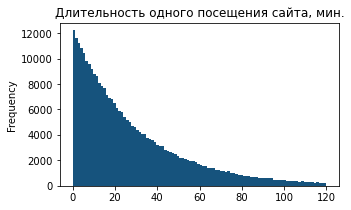

In [24]:
visits['sess_minutes'].plot.hist(bins=100, range=(0,120), figsize=(5,3),
        color=colors_list[1], title='Длительность одного посещения сайта, мин.');

- Средняя продолжительность сессии **30 минут**. Половина посетителей тратит **от 8 до 41 минуты** за одну сессию. 
- Самое длительное время, которое клиент провёл на сайте составило около **7.5 часов**. Многовато, конечно, но и такое возможно случается. 

Нулевые и низкие значения нельзя считать аномальными, если знать, как рассчитывается длительность пребывания клиента на сайте. Например, при расчёте этого показателя в **Яндекс.Метрике**, время посещения равно нулю, если: 
- пользователь зашел на статью, не нажимая на ссылки и не совершая иных действий, кроме скроллинга страницы. Счетчик получит информацию только об одном действии пользователя – загрузке страницы;
- пользователь зашел на сайт, но его в этот момент отвлекли. Он отошел от компьютера на долгое время. Затем вернулся и начал читать контент, переходить по ссылкам и совершать иные действия. В данном случае Метрика зафиксирует два визита. У первого время будет 00:00, у второго время будет отличаться от нуля.

Таким образом, не стоит рассматривать при анализе короткие сессии. Кроме того, у нас нет информации о других событиях и действиях клиентов на сайте. 

Найдём суммарное время, проведенное на сайте одним пользователем и проверим, различается ли в среднем это значение для платящих и неплатящих пользователей. 

In [25]:
display(profiles.groupby('payer')['sess_times']
        .describe().astype(int)
        .style.set_caption('Суммарное время, проведённое на сайте одним пользователем, мин.'))

,count,mean,std,min,25%,50%,75%,max
payer,,,,,,,,
False,141127,49,44,0,16,36,68,450
True,8881,268,247,0,51,179,447,1258


В данном случае не стоит рассуждать о том, что один пользователь провёл на сайте за всё время 20 часов, а другой - только 16 минут. Во-первых, мы знаем, как рассчитывается длительность сессий. Во-вторых, клиенты впервые пришли на сайт в разные дни. 

Но очевидно, что платящие пользователи тратят среднем в 5 раз больше времени. 
Приблизительно такие же выводы можно сделать, если посчитать количество дней, в которые клиент заходил на сайт. 

In [26]:
display(profiles.groupby('payer')['dates_count']
        .describe().astype(int)
        .style.set_caption('Количество дней, в которые клиент был на сайте'))

,count,mean,std,min,25%,50%,75%,max
payer,,,,,,,,
False,141127,1,0,1,1,1,2,8
True,8881,8,7,1,2,6,15,46


Пользователи, которым не понравились предлагаемые на сайте развлечения, за редким исключением, больше не возвращаются. Но и те, кто хотя бы раз оформил заказ на сайте, почти не приходят повторно. В целом такую маленькую табличку можно озвучить так: в подавляющем большинстве случаев конверсия происходит на первый день лайфтайма. Потому что те, кто приходит больше одного раза вероятнее всего станут покупателями. 

Количество дней, за которые собраны данные - 179. Учитывая, что у всех разное время первого визита, можно считать, что среднее время в приложении для каждого клиента равно 90. Медиана количества дней платящих пользователей равна 6. Т.е. среднестатистический клиент, хотя бы раз оплативший заказ, возвращается в среднем 2 раза в месяц. Это очень редко для развлекательного приложения, куда многие клиенты заходят в том числе и с мобильных устройств.

#### DAU, WAU, MAU и липкость

Рассчитаем средние значения количества уникальных посетителей за день, за неделю и за месяц.

In [27]:
dau = int(visits.groupby('session_date').agg({'user_id': 'nunique'}).mean())
print(f'DAU =  \033[1m{dau:,}\033[0m'.replace(',',' '))
wau = int(visits.groupby('week').agg({'user_id': 'nunique'}).mean())
print(f'WAU =  \033[1m{wau:,}\033[0m'.replace(',',' '))
mau = int(visits.groupby('month').agg({'user_id': 'nunique'}).mean())
print(f'MAU = \033[1m{mau:,}\033[0m'.replace(',',' '))
print(f'Sticky Factor = \033[1m{dau/mau:0.2%}\033[0m')


DAU =  1 684
WAU =  8 353
MAU = 28 989
Sticky Factor = 5.81%


Низкое значение Sticky Factor говорит о том, что пользователи плохо задерживаются в приложении. Видимо отсутствует какой-то фактор, влияющий на заинтересованность пользователей. Например, неразнообразный контент. Пользователь, перепробовавший все предлагаемые развлечения, теряет интерес к приложению.

### Количество новых пользователей

#### По странам

Посмотрим, из каких стран пользователи приходили на сайт чаще.

In [28]:
users_regions = profiles.pivot_table(index='region',
                    values='payer', aggfunc=['count', 'sum', 'mean'])
users_regions.columns = ['users', 'payers', 'payers_mean']
users_regions.insert(1, 'users_mean', users_regions['users']/len(profiles))
users_regions['total_payers_mean'] = users_regions['payers']/len(profiles.query('payer'))
users_regions = users_regions.sort_values(by='users', ascending=False)

display(users_regions
        .style.background_gradient('Blues', subset=['payers_mean', 'total_payers_mean'])
        .format('{:0.2%}', subset=['users_mean', 'payers_mean', 'total_payers_mean']))

,users,users_mean,payers,payers_mean,total_payers_mean
region,,,,,
USA,100002,66.66%,6902,6.90%,77.72%
UK,17575,11.72%,700,3.98%,7.88%
France,17450,11.63%,663,3.80%,7.47%
Germany,14981,9.99%,616,4.11%,6.94%


- Большая часть посетителей сайта (67%) - пользователи из США. Доля платящих среди них также самая большая - почти 7%, что составляет 78% от всех, кто оплачивал заказы. Т.е. пользователи из США довольно охотно платят за развлечения.

- Посетители сайта из Германии, Франции и Великобритании похожи по количеству пользователей и по доле платящих. хотя в Германии платят чуть чаще. Стоит найти способы привлечь больше клиентов и увеличить конверсию для этих стран.

#### По типу устройства
Посмотрим, какими устройствами обычно пользуются клиенты. 

In [29]:
users_devices = profiles.pivot_table(index='device',
                    values='payer', aggfunc=['count', 'sum', 'mean'])
users_devices.columns = ['users', 'payers', 'payers_mean']
users_devices.insert(1, 'users_mean', users_devices['users']/len(profiles))
users_devices['total_payers_mean'] = users_devices['payers']/len(profiles.query('payer'))
users_devices = users_devices.sort_values(by='users', ascending=False)

display(users_devices
        .style.background_gradient('Blues', subset=['payers_mean', 'total_payers_mean'])
        .format('{:0.2%}', subset=['users_mean', 'payers_mean', 'total_payers_mean']))

,users,users_mean,payers,payers_mean,total_payers_mean
device,,,,,
iPhone,54479,36.32%,3382,6.21%,38.08%
Android,35032,23.35%,2050,5.85%,23.08%
PC,30455,20.30%,1537,5.05%,17.31%
Mac,30042,20.03%,1912,6.36%,21.53%


Самыми активными и самыми платящими оказались клиенты, которые входят в приложение с айфона. Их оказалось 36% от общего числа посетителей, а платящие пользователи этой группы составили 38% от всех плательщиков.

Судя по данным этой таблицы, доли платящих пользователей в этих группах не сильно различаются. По вовлеченности чуть отстают только пользователи локальных устройств (PC).

#### По каналу привлечения

In [30]:
users_channels = profiles.pivot_table(index='channel',
                    values='payer', aggfunc=['count', 'sum', 'mean'])
users_channels.columns = ['users', 'payers', 'payers_mean']
users_channels.insert(1, 'users_mean', users_channels['users']/len(profiles))
users_channels['total_payers_mean'] = users_channels['payers']/len(profiles.query('payer'))
users_channels = users_channels.reset_index().sort_values(by='total_payers_mean', ascending=False)

display(users_channels
        .style.background_gradient('Blues', subset=['users','payers_mean', 'total_payers_mean'])
        .format('{:0.2%}', subset=['users_mean', 'payers_mean', 'total_payers_mean']))

,channel,users,users_mean,payers,payers_mean,total_payers_mean
1,FaceBoom,29144,19.43%,3557,12.20%,40.05%
6,TipTop,19561,13.04%,1878,9.60%,21.15%
10,organic,56439,37.62%,1160,2.06%,13.06%
7,WahooNetBanner,8553,5.70%,453,5.30%,5.10%
0,AdNonSense,3880,2.59%,440,11.34%,4.95%
5,RocketSuperAds,4448,2.97%,352,7.91%,3.96%
2,LeapBob,8553,5.70%,262,3.06%,2.95%
4,OppleCreativeMedia,8605,5.74%,233,2.71%,2.62%
9,lambdaMediaAds,2149,1.43%,225,10.47%,2.53%
8,YRabbit,4312,2.87%,165,3.83%,1.86%


- Около 38% всех посетителей приходят без помощи рекламы. Cреди таких клиентов всего лишь 2% готовы сделать заказ, а это только 13% от общего числа всех платящих пользователей; 

- Максимальная доля платящих клиентов во второй по величине группе - **FaceBoom**. Из них 12% оплатили хотя бы один заказ. Это 40% (!) от общего количества всех платящих.
- 13% посетителей приходят с сайта **TipTop**, из них почти 10% оплачивают хотя бы один заказ, это составляет 21% от всех платящих.
- Источники **AdNonSense** и **lambdaMediaAds** хотя и привлекают большой процент платящих, являются малочисленными и их пользователи составляют только 2.6% и 1.4% от всех. Неплохо бы завлечь больше пользователей с этих площадок.

Обратим внимание на органических пользователей. Их количество довольно велико, их привлечение бесплатно, они попадают на сайт по собственному желанию, т.е. проявляют интерес к содержанию сайта. Но при этом редко соглашаются платить, в отличие от клиентов, пришедших по рекламе. Возможно, на самом сайте содержится недостаточно информации о предоставляемом контенте для того чтобы привлекать покупателей. 

Посмотрим, отличается ли доля органических пользователей в зависимости от страны.

In [31]:
# создадим таблицу, где посчитаем количество пользователей в зависимости от региона
reg_profile = profiles.pivot_table(index=['region', 'device', 'channel'],
                    values='payer', aggfunc=['count', 'sum']).reset_index()
reg_profile.columns = reg_profile.columns.droplevel(1)
reg_profile = reg_profile.rename(columns={'count': 'users', 'sum': 'payers'})

#выделим из этой таблицы органических пользователей
users_organic = (reg_profile.query('channel=="organic"')
           .groupby('region')[['users', 'payers']].sum()
           .sort_values(by='users', ascending=False))
users_organic['users_mean'] = users_organic['users']/users_organic['users'].sum()
users_organic['payers_mean'] = users_organic['payers']/users_organic['payers'].sum()
users_organic['total_payers_mean'] = users_organic['payers'] / users_organic['users']

display(users_organic.style.background_gradient('Blues', subset='payers_mean')
        .format('{:0.2%}', subset=['users_mean','payers_mean', 'total_payers_mean']))

,users,payers,users_mean,payers_mean,total_payers_mean
region,,,,,
USA,38173,794,67.64%,68.45%,2.08%
UK,6421,131,11.38%,11.29%,2.04%
France,6392,109,11.33%,9.40%,1.71%
Germany,5453,126,9.66%,10.86%,2.31%


Судя по таблице, доля плательщиков среди органических пользователей низкая во всех странах. Чуть лучше ситуация в Германии и хуже всего во Франции. Например, доля органических пользователей из США - это четверть всех пользователей в нашей базе данных. Но из этого огромного количества всего лишь 2% совершают покупки, что составляет около 9% от всех платящих пользователей. 

### Портреты пользователей разных стран

#### Все пользователи

Воспользуемся уже созданной таблицей `reg_profile`. Посмотрим, как распределено количество пользователей по типам устройств и каналам привлечения. Не будем отображать количество платящих пользователей по устройствам, так как такие диаграммы практически не отличаются. Т.е. доли устройств среди платящих и неплатящих пользователей совпадают.

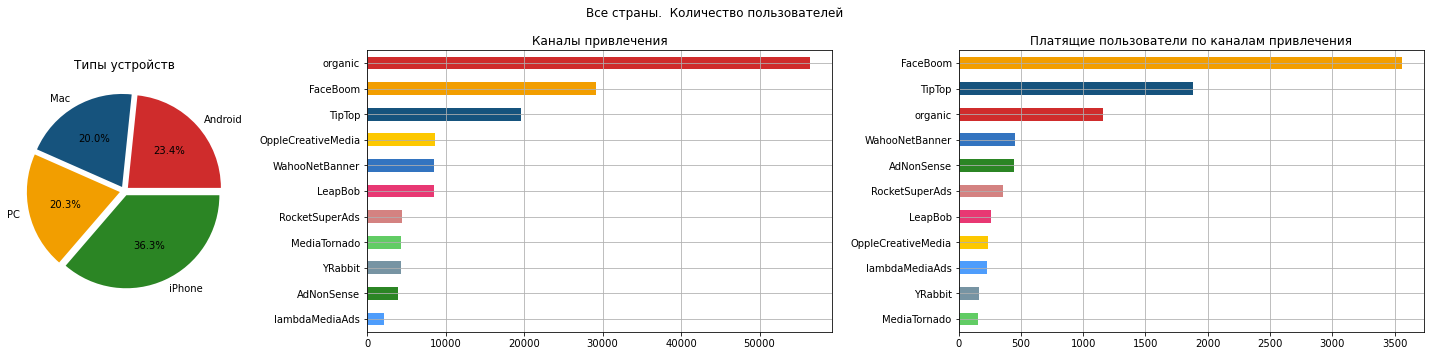

In [32]:
reg_plot('')

#### США

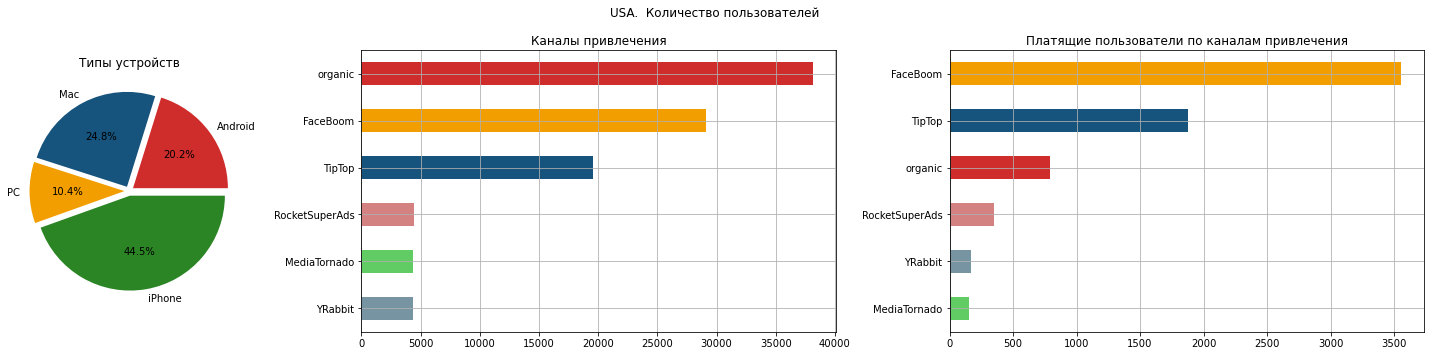

In [33]:
reg_plot('USA')

#### Великобритания

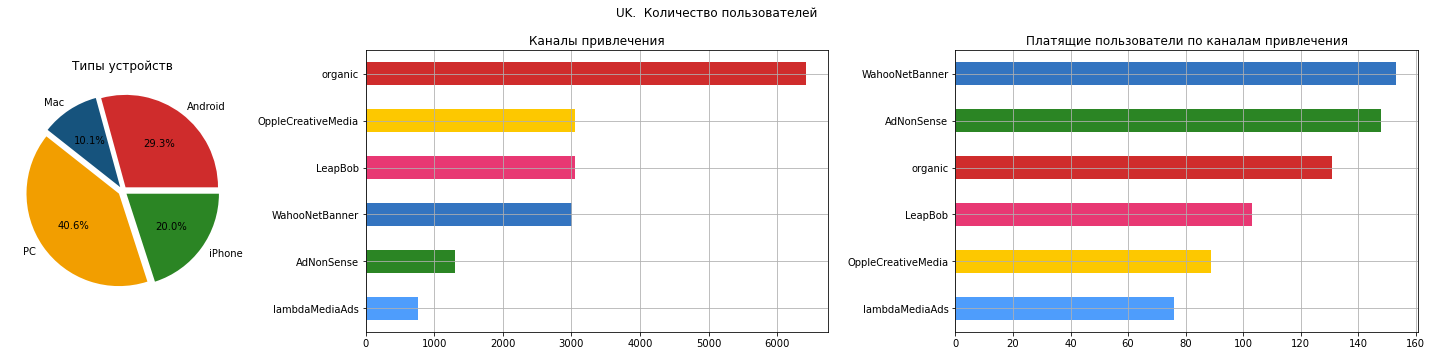

In [34]:
reg_plot('UK')

#### Франция

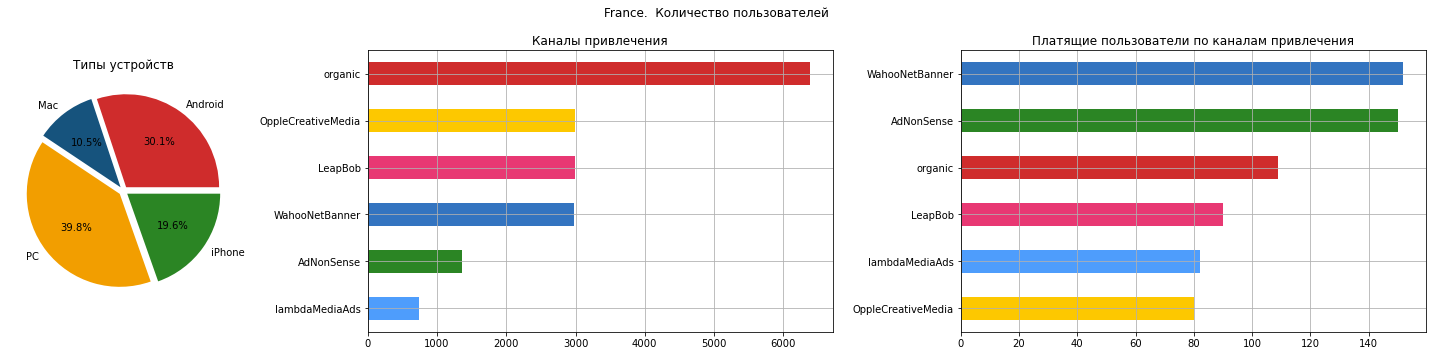

In [35]:
reg_plot('France')

#### Германия

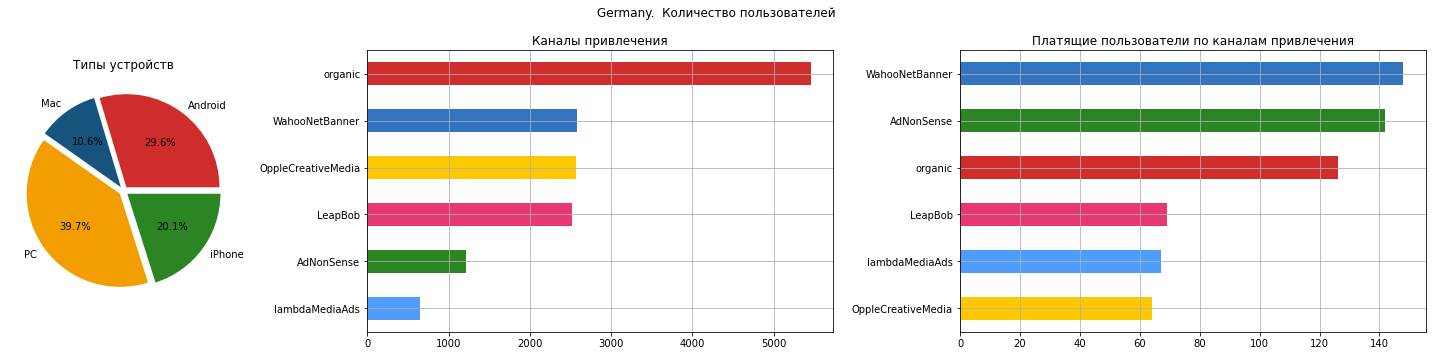

In [39]:
reg_plot('Germany')

#### Региональные различия

<font style="color:navy">Используемые устройства</font>. В США чаще встречаются пользователи iPhone и Мac, в Европе популярее Android. Для платящих пользователей доли устройств практически не отличаются. Из чего можно предположить, что тип устройства скорее всего не влияет на конверсию. 

<font style="color:navy">Каналы привлечения пользователей</font> в США и Европе абсолютно разные и никак не пересекаются. 
- Так как пользователей из США больше, то и каналы, которые используются там имеют более высокие показатели. Поэтому **FaceBoom** и **TipTop** вышли в лидеры по всем странам. 
- Большинство клиентов во всех трёх странах Европы пришли с каналов OppleCreativeMedia, LeapBob и WahooNetBanner. 
- **OppleCreativeMedia** на первом месте по количеству привлеченных пользователей в Великобритании и Франции и на втором - в Германии. Но при этом количество платящих пользователей этого источника попадает в нижние строчки диаграммы. Надо попытаться увеличить конверсию этой группы посетителей нашего сайта.
- Но при этом количество платящих пользователей больше всего на **WahooNetBanner** и AdNonSense.
- Стоит обратить внимание на **AdNonSense**. Во всех трёх странах Европы она не попадает в тройку лидеров по количеству привлечённых пользователей. Но при этом на втором месте по количеству платящих пользователей. 

### <font style="color:navy">Итоги исследовательского анализа данных</font> 

1.   Анализ профилей пользователей показал признаки того, что <font style="color:navy">пользователи плохо задерживаются в приложении.</font>
    - средняя продолжительность одного визита на сайт составляет 30 минут;
    - конверсия происходит в подавляющем большинстве случаев на первый день лайфтайма;
    - платящие пользователи проводят в приложении в 5 раз больше времени, а посещают сайт в среднем всего лишь от 6 до 8 раз за всё время;
    - активность посетителей имеет низкое значение Sticky Factor (менее 6%).
    
    
2.   При подсчёте количества пользователей по разным группам мы выяснили следующее:
    - большая часть посетителей сайта (67%) из США и они охотнее остальных переходят в покупатели;
    - пользователи из Германии, Франции и Великобритании похожи по количеству и по доле платящих;
    - цифры свидетельствуют о <font style="color:navy">низкой конверсии органических пользователей</font>, за счёт чего увеличились доли покупателей среди других каналов привлечения;
    - существуют два канала привлечения, лидирующих по количеству посетителей и по доле платящих пользователей - TipTop и FaceBoom;
    - конверсия не зависит от типа используемого устройства.
    

3. Региональные различия:
    - в США чаще встречаются пользователи iPhone и Мac, в Европе популярее Android;
    - каналы привлечения пользователей в США и Европе разные;
    - учитывая, что пользователей из США больше, американские каналы рекламы (FaceBoom и TipTop) привлекают больше пользователей, чем все остальные;
    - в Европе по количеству клиентов лидируют источники  OppleCreativeMedia, LeapBob и WahooNetBanner;
    - OppleCreativeMedia скорее всего имеет очень низкую конверсию пользователей; 
    - WahooNetBanner и малочисленный канал AdNonSense обладают неплохой конверсией.
    
<hr style="color:navy; align:left; height:1pt">
<font style="color:navy"><b>Выводы:</b></font>

- Обратить внимание на низкое удержание пользователей всех групп, найти способы его увеличить, особенно для каналов, привлекающих больше пользователей - FaceBoom, TipTop, OppleCreativeMedia.

- Проанализировать причины низкой конверсии, в особенности для органических пользователей и пользователей OppleCreativeMedia. В качестве примеров можно рассмотреть источники FaceBoom и WahooNetBanner.

- Попытаться привлечь больше новых пользователей на каналах с высокой конверсией, например, AdNonSense.

<h2 style="color:navy">Маркетинг</h2> 

### Анализ расходов на рекламу

#### Общие вычисления

In [40]:
print('За весь период было оплачено\033[1m ', 
      f'{round(costs["costs"].count()):,} \033[0m'.replace(',', ' '),
      'счетов.')
print('На общую сумму \033[1m ', 
      f'{round(costs["costs"].sum()):,} \033[0m'.replace(',', ' '),
      'долларов.')

За весь период было оплачено  1 800  счетов.
На общую сумму   105 497  долларов.


In [41]:
month_income = orders.groupby(orders['event_dt'].dt.month)['revenue'].sum().to_frame().astype(int)
month_income.index.name = 'month'
month_income['costs'] = costs.groupby(costs['dt'].dt.month)['costs'].sum().astype(int)
month_income['income'] = month_income['revenue'] - month_income['costs']
month_income['roi']= month_income['revenue']/month_income['costs']

display(month_income.style.background_gradient('Blues', subset='roi')
        .format('{:0.3}', subset='roi'))

,revenue,costs,income,roi
month,,,,
5,15787,9978,5809,1.58
6,26428,15090,11338,1.75
7,35988,16447,19541,2.19
8,40401,20657,19744,1.96
9,44941,22441,22500,2.0
10,52415,20882,31533,2.51


#### Расходы на каналы привлечения

In [42]:
# создадим таблицу расходов по всем каналам
costs_per_channel = costs.pivot_table(index='channel', values='costs', aggfunc='sum')
costs_per_channel.columns=['costs_sum']
costs_per_channel = costs_per_channel.sort_values(by='costs_sum', ascending=False)
costs_per_channel['costs_sum'] = costs_per_channel['costs_sum'].astype('int')
costs_per_channel['costs_mean'] = costs_per_channel['costs_sum'] / costs_per_channel['costs_sum'].sum()

tt_mean = (users_channels.query('channel=="FaceBoom"|channel=="TipTop"')['users'].sum()/
           users_channels.query('channel!="organic"')['users'].sum())
print('Доля пользователей каналов FaceBoom и TipTop среди неорганических пользователей:', 
      f'\033[1m{tt_mean:0.2%} \033[0m')
tt_mean = (users_channels.query('channel=="FaceBoom"|channel=="TipTop"')['payers'].sum()/
           users_channels.query('channel!="organic"')['payers'].sum())
print('Доля плательщиков с каналов FaceBoom и TipTop среди платящих неорганических пользователей:', 
      f'\033[1m{tt_mean:0.2%} \033[0m')

display(costs_per_channel.style.background_gradient('Blues', subset='costs_sum')
        .format('{:0.2%}', subset='costs_mean'))

Доля пользователей каналов FaceBoom и TipTop среди неорганических пользователей: 52.05% 
Доля плательщиков с каналов FaceBoom и TipTop среди платящих неорганических пользователей: 70.39% 


,costs_sum,costs_mean
channel,,
TipTop,54751,51.90%
FaceBoom,32445,30.76%
WahooNetBanner,5151,4.88%
AdNonSense,3911,3.71%
OppleCreativeMedia,2151,2.04%
RocketSuperAds,1833,1.74%
LeapBob,1797,1.70%
lambdaMediaAds,1557,1.48%
MediaTornado,954,0.90%


На рекламу каналов FaceBoom и TipTop было потрачено почти 83% всех средств. Эти два канала привели чуть больше 60% платящих пользователей. Или 70% без учета органических. Казалось бы неплохой результат, но речь идет о довольно больших суммах. Поэтому те самые 20 или 10% могли бы принести гораздо больше.  

### Динамика расходов 

#### Динамика по всем датам

Посмотрим, как изменялись расходы с течением времени. 
Графики построим, применив функцию сглаживания с шириной окна в 7 дней. Поскольку расходы на TipTop в 10 раз превышают расходы на WahooNetBanner, который идёт всего лишь третьим по счёту, добавим график для всех остальных каналов в увеличенном виде.
Поскольку это, по сути один и тот же график, легенду выведем только одну.

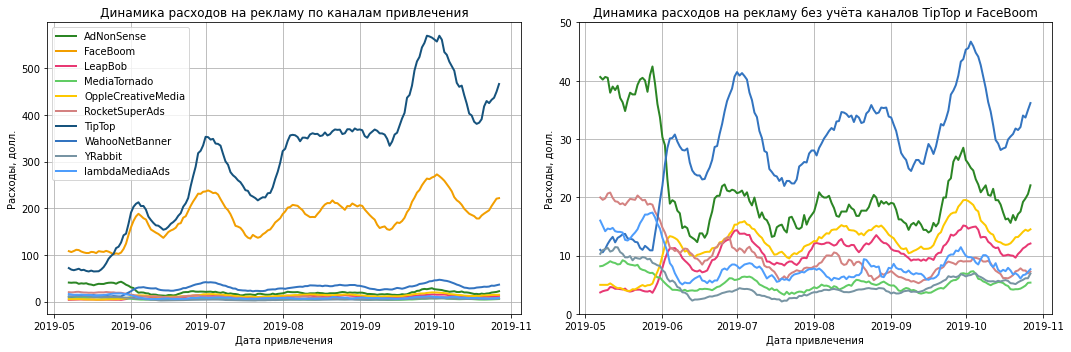

In [43]:
#  создадим сводную таблицу платежей
costs_history = costs.groupby(['channel', 'date'])['costs'].sum().to_frame()
plot_colors = list(colors_dict.get(x, 'gray') for x in \
        costs_history.reset_index()['channel'].unique())

# Построим два графика
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# 1) для всех каналов
# применим сглаживание и построим график
smoothing(costs_history, 7, 'date', 'costs', 'channel').plot(
          grid=True, ax=ax[0], color=plot_colors, linewidth=2, 
          xlabel = 'Дата привлечения', ylabel = 'Расходы, долл.',
          title = 'Динамика расходов на рекламу по каналам привлечения')
ax[0].legend(loc='upper left')

# 2) для каналов с низким значением расходов
# применим сглаживание и построим график
smoothing(costs_history, 7, 'date', 'costs', 'channel').plot(
          grid=True, ax=ax[1], ylim=(0,50), legend=None, 
          color=plot_colors, linewidth=2, 
          xlabel = 'Дата привлечения', ylabel = 'Расходы, долл.',
          title = 'Динамика расходов на рекламу без учёта каналов TipTop и FaceBoom')

plt.subplots_adjust(top=0.85)
plt.tight_layout(h_pad=2)
plt.show();

- Судя по расходам на рекламу источников из **США**, не удивительно, что рекламная кампания приносит в последние месяцы убытки. С августа по ноябрь расходы на ТipTop увеличились вдвое. На этот канал в стало тратиться средств в 2 раза больше, чем на FaceBoom, при этом количество платящих пользователей, привлечённых TipTop, в 2 раза меньше чем у FaceBoom. 


- В **Европе** основная часть расходов приходится на канал WahooNetBanner и чуть меньше - на AdNonSense. Если вспомним анализ региональных различий, то именно эти две компании привлекают больше всего платящих пользователей во всех трёх странах Европы. Поэтому такое вложение вполне логично. Начиная с июня расходы на канал AdNonSense были сокращены почти в 2 раза, эти средства ушли на поддержание канала WahooNetBanner. 


- Все графики cправа выглядят похожими - пики приблизительно совпадают по датам. Можно предположить, что в начале июля, возможно в середине августа и в начале октября нашей компанией проводилась очередная рекламная акция. Например, были размещены новые баннеры на всех источниках (а это возможно новые счета на оплату). После чего отмечался всплеск активности клиентов. И если, например, оплата рекламы зависит от количества просмотров (СРМ), или скорее от количества кликов (СРС), то и наши маркетинговые затраты в этот период увеличиваются. Что касается пиков на некоторых графиках в середине августа, то либо это была неудачная рекламная кампания, либо это был небольшой сезонный всплеск активности клиентов. 


- Похожие по форме графики свидетельствуют ещё о том, что клиенты, привлечённые из разных каналов ведут себя похожим образом, одинаково реагируя на какие-либо события (на те же рекламные кампании, сезонные изменения, новый контент сайта и т.д. и т.п). 

Посмотрим, как выглядят эти же данные на графиках по месяцам и неделям.

#### Динамика по месяцам и неделям

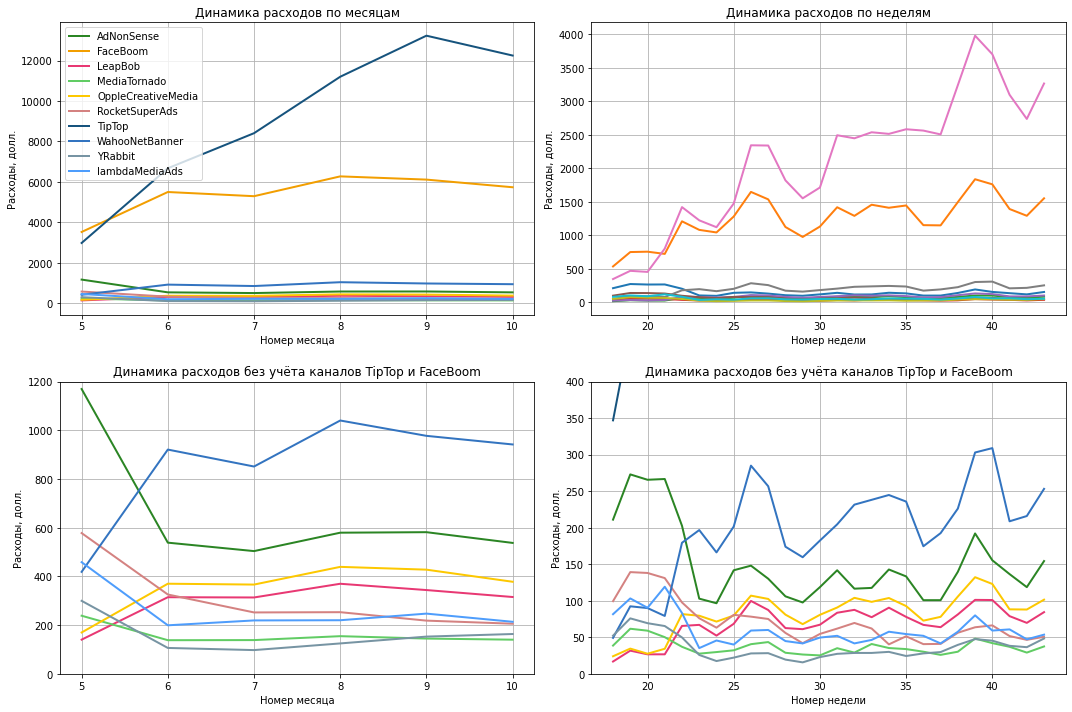

In [44]:
# Построим графики динамики расходов
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 1) по месяцам для всех каналов
costs_plot = costs.pivot_table(index='month', columns='channel', 
             values='costs', aggfunc='sum')
plot_colors = list(colors_dict.get(x, 'gray') for x in costs_plot.columns)
costs_plot.plot(grid=True, ax=ax[0,0],  color=plot_colors, 
        linewidth=2, legend=None, 
        xlabel = 'Номер месяца', ylabel = 'Расходы, долл.',
        title = 'Динамика расходов по месяцам')
ax[0,0].legend(loc='upper left')

# 2) для каналов с низким значением расходов по месяцам
costs_plot.plot(grid=True, ax=ax[1,0],  ylim=(0,1200), 
        color=plot_colors, linewidth=2, legend=None,
        xlabel = 'Номер месяца', ylabel = 'Расходы, долл.',
        title = 'Динамика расходов без учёта каналов TipTop и FaceBoom')

# 3) по неделям для всех каналов
costs_plot = costs.pivot_table(index='week', columns='channel', 
                values='costs', aggfunc='sum')
plot_colors = list(colors_dict.get(x, 'gray') for x in costs_plot.columns)
costs_plot.plot(grid=True, ax=ax[0,1], linewidth=2, legend=None,
        xlabel = 'Номер недели', ylabel = 'Расходы, долл.',
        title = 'Динамика расходов по неделям')

# 4) для каналов с низким значением расходов по неделям
costs_plot.plot(grid=True, ax=ax[1,1],  ylim=(0,400), 
        color=plot_colors, linewidth=2, legend=None,
        xlabel = 'Номер недели', ylabel = 'Расходы, долл.',
        title = 'Динамика расходов без учёта каналов TipTop и FaceBoom')

plt.subplots_adjust(top=0.85)
plt.tight_layout(h_pad=2)
plt.show();


По сути, эти графики повторяют картину, которая получилась на сглаженном графике по дням выше. Надо будет проверить предположение, что причина убытков кроется в избыточных расходах на источник TipTop. Т.е. надо будет либо изменить способ оплаты рекламы на этом канале, либо выяснить причины низкой конверсии пользователей

### Стоимость привлечения клиентов (САС)

Посмотрим как распределены значения САС и сравим их со значением среднего чека на одного посетителя.

In [45]:
cac = profiles.query('channel!="organic"')['cac'].describe().to_frame()

display(cac.query('~(index.isin(["count","std"]))').T.style
        .set_caption('Стоимость привлечения одного клиента, долл.')
        .format('{:0.4}'))

non_organic_count=len(profiles.query("channel!='organic'"))
print('Средняя стоимость привлечения одного клиента: ', 
      f'\033[1m{costs["costs"].sum()/non_organic_count:0.3} \033[0m долл.')
print('Cредний доход от одного клиента (без учета орг.пользователей): ', 
      f'\033[1m{orders["revenue"].sum()/non_organic_count:0.2} \033[0m долл.')

,mean,min,25%,50%,75%,max
cac,1.127,0.1246,0.2571,1.081,1.129,3.715


Средняя стоимость привлечения одного клиента:  1.13  долл.
Cредний доход от одного клиента (без учета орг.пользователей):  2.3  долл.


Найдем стоимость привлечения для каждого канала рекламы.

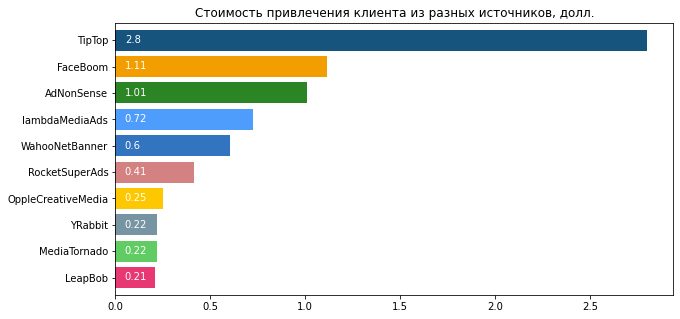

In [65]:
# выведем на столбчатой диаграмме
cac_mean = profiles.groupby('channel')['cac'].mean().sort_values()
plot_colors = list(colors_dict.get(x, 'gray') for x in cac_mean.index)
cac_mean.plot.barh(figsize=(10,5), color=plot_colors, width=.8,
            xlabel='', ylabel='CAC, долл.', legend=None,    
            title='Стоимость привлечения клиента из разных источников, долл.')
i = -.1
for row in cac_mean :
    plt.text(.05, i, round(row,2), horizontalalignment='left', color='white')
    i+=1

plt.show();

Вот и главный ответ про источник низких доходов - TicTop. Очень дорого обходятся пользователи, привлечённые с этого канала.

### Доходы

Раз уж мы посмотрели на расходы, взглянем и на суммы доходов. Не станем смотреть распределение доходов по типам устройств или по регионам. Достаточно посмотреть, какие доходы по каналами рекламы.

In [47]:
print('За весь период было получено\033[1m ', 
      f'{round(orders["revenue"].count()):,} \033[0m'.replace(',', ' '),
      'платежей от клиентов.')
print('На общую сумму \033[1m ', 
      f'{round(orders["revenue"].sum()):,} \033[0m'.replace(',', ' '),
      'долларов.')

revenue_per_channel = profiles.groupby('channel')[['orders_count', 
                        'revenue_per_user']].sum().astype(int)
revenue_per_channel.columns = ['orders_count', 'revenue']
revenue_per_channel['revenue_mean'] = revenue_per_channel['revenue'] / revenue_per_channel['revenue'].sum()
display(revenue_per_channel.style.background_gradient('Blues', subset='revenue_mean')
        .format('{:0.2%}', subset='revenue_mean'))

За весь период было получено  40 212  платежей от клиентов.
На общую сумму   215 963  долларов.


,orders_count,revenue,revenue_mean
channel,,,
AdNonSense,683,3697,1.71%
FaceBoom,4734,25637,11.87%
LeapBob,1787,9560,4.43%
MediaTornado,1068,5752,2.66%
OppleCreativeMedia,1547,8365,3.87%
RocketSuperAds,2168,11598,5.37%
TipTop,13024,69574,32.22%
WahooNetBanner,3737,20006,9.26%
YRabbit,1157,6201,2.87%


Если вспомним, то по количеству плательщиков на первом месте был FaceBoom, но клиенты, привлеченные каналом TipTop приносят нам более 40% доходов, тогда как FaceBoom отодвинулся на второе место и сильно отстает по этому показателю. Надо будет проверить удержание. 

На третьем месте по принесённым доходам - WahooNetBanner, которая имеет максимальную долю от количества пользователей во всех странах Европы.

### Итоги анализа расходов на рекламу

1. Основной причиной убытков по всей вероятности являются большие расходы на рекламу канала TipTop при низкой конверсии пользователей, привлеченных этим источником.

2. Оновная часть расходов в Европе приходится на каналы WahooNetBanner и AdNonSense, имеющих, судя по всему, неплохую конверсию. Т.е. в целом ситуация по маркетингу в Европе лучше, чем в США. Но большее количество пользователей из Америки снижает доходность.

3. Пользователи, привлечённые из разных каналов в динамике ведут себя похожим образом, одинаково реагируя на какие-то внешние изменения (например, проводимые рекламные кампании или сезонность). 

<hr style="color:navy; align:left; height:1pt">
<font style="color:navy"><b>Выводы:</b></font>

- Срочно нужно сокращать расходы на рекламу канала TipTop, постаравшись при этом не уменьшить количество пользователей, привлеченных этим каналом. Например, поменяв тип оплаты. Одновременно разработать меры по увеличению конверсии.

- Следует увеличить долю европейских источников рекламы. Например, увеличить расходы на AdNonSense, чтобы привлечь больше пользователей с хорошей конверсией.


<h2 style="color:navy">Оценка окупаемости рекламы</h2> 

### Определение данных для анализа

Анализ проводится 1 ноября 2019 года, но данные о расходах на рекламу собраны лишь до 27 октября включительно. Если мы включим 3 последних дня, когда не было никаких трат (счета могут прийти позже или их не успели внести в базу), то это может исказить данные. Поэтому поступим по правилам и рассмотрим период с 1 мая по **27 октября 2019**.

Мы выяснили, что клиенты редко заходят на сайт повторно. В среднем это может происходить два раза в месяц. Плюс, как утверждает руководство Procrastinate Pro+, в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Поэтому в ходе рассчетов будем использовать горизонт анализа в **14 дней**

Проведем анализ всех метрик **без учёта органических пользователей**, расходы на которых для наших данных нулевые:
- При исключении из анализа органических пользователей уменьшается размер когорты и уменьшается выручка при том, что расходы на рекламу остаются прежними. Легко предсказать, что САС и ROI уменьшатся. 

- LTV зависит как от выручки, так и от размера когорты. Поэтому поведение этой метрики сложнее предсказать. В нашем случае органические пользователи приносят меньше дохода и имеют низкую конверсию, поэтому значения коэффициента конверсии и LTV станут выше.

Проанализируем окупаемость в разбивке по группам. Наша цель - найти наиболее перспективные группы, чтобы на их основе решить, как можно увеличить показатели. И отследить самые "невыгодные" группы, чтобы не вкладывать в них средств больше, чем требуется.

При анализе учтём, что графики динамики строятся с помощью функции сглаживания по средним значениям. Поэтому пики и "ямы" на графиках не всегда свидетельствуют о реальном росте или падении значений, особенно если в данных встречаются аномально большие выбросы. Отслеживать динамику следует только по общей тенденции к росту или снижению показателей. 

In [48]:
# оставим в таблице только пользователей, привлечённых рекламой
# если понадобится, можем создать изначальную таблицу снова с помощью get_profiles()
profiles = profiles.query('channel!="organic"')

### Все группы пользователей

#### LTV, CAC и ROI всех пользователей

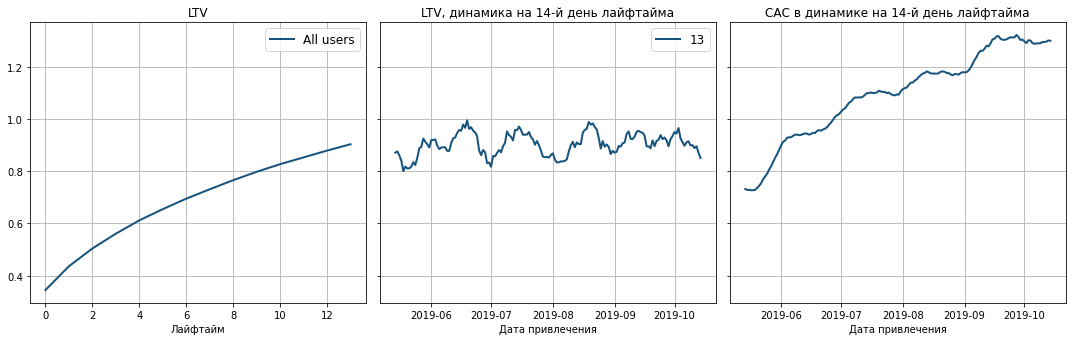

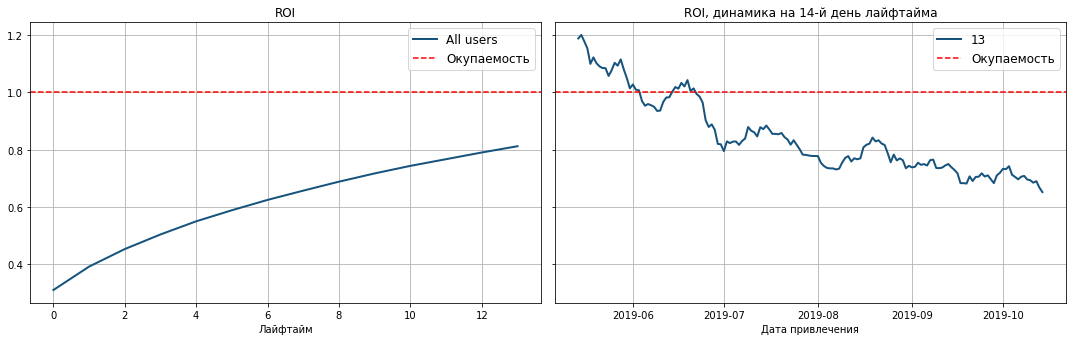

In [49]:
df_grouped, df_history = business_metrics('LTV')
mr_plot(df_grouped, df_history)
df_grouped, df_history= business_metrics('ROI')
mr_plot(df_grouped, df_history)

- **LTV** в зависимости от лайфтайма растёт, но очень незначительно, т.е. наши пользователи не спешат совершать повторные покупки в первые 14 дней. Очевидно, что нужно работать над увеличением заинтересованности клиентов в продукте и желанием совершать повторные покупки.Средняя выручка в зависимости от лайфтайма растёт очень медленно, а в динамике не увеличивается. 

- **САС** резко выросла с мая до середины июля. Далее мы также видим очень сильный рост стоимости привлечения клиентов со временем. С начала августа САС уверенно поднялся выше LTV, т.е. расходы одназначно превысили доходы. Понаблюдав за данными еще в августе, можно было бы это заметить и попытаться начать исправлять ситуацию. 

- **ROI** постоянно снижается и c трудом достигает окупаемости к 14-му дню лайфтайма. Судя по динамике окупаемость стала отрицательной ещё в июле. Т.е., как уже было замечено, эти изменения можно было отследить и раньше.

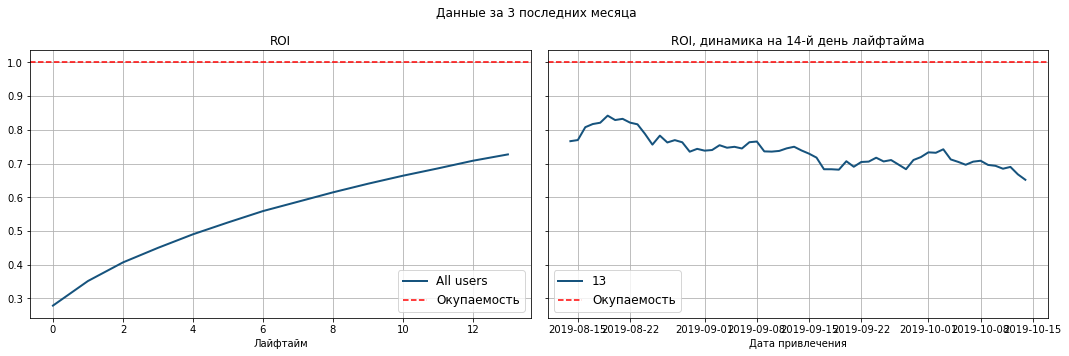

In [50]:
df_grouped, df_history = business_metrics('ROI', 
        prof=profiles.query('date>=datetime(2019, 8, 1).date()'))
mr_plot(df_grouped, df_history, title='Данные за 3 последних месяца')

Очень грустная ситуация. Надеюсь, еще не поздно всё исправить.

#### Конверсия и удержание всех пользователей

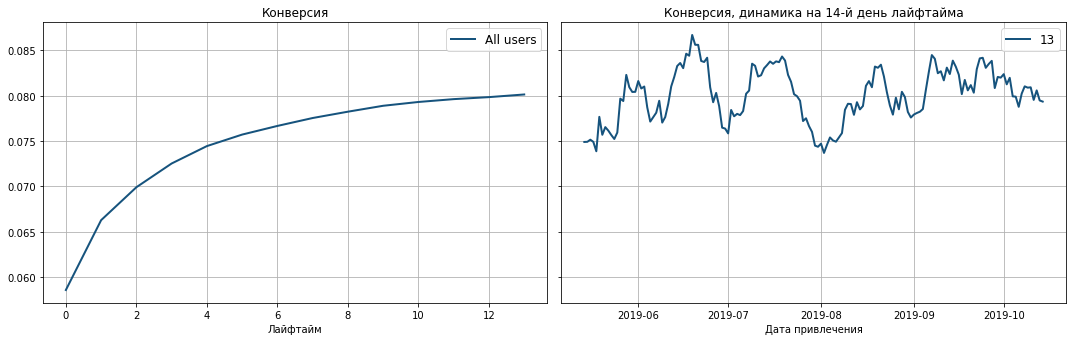

In [51]:
df_grouped, df_history = business_metrics('CR')
mr_plot(df_grouped, df_history, window=14)

- **Конверсия** хорошо растёт только в первые 2-3 дня лайфтайма. 
- В динамике коэффициент конверсии не увеличивается в целом. Это лучше видно при уменьшении ширины окна сглаживания.
- Наименьшая конверсия наблюдалась в мае, после чего она резко увеличилась. Чтобы и в дальнейшем увеличивать эту метрику, можно будет найти причину такого скачка.

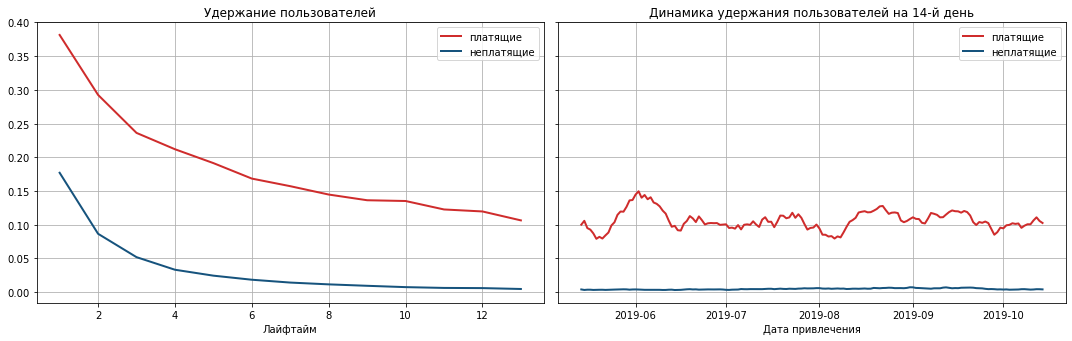

In [52]:
df_grouped, df_history = business_metrics('RR')
mr_plot(df_grouped, df_history)

- Что касается неплатящих пользователей, то мы уже знаем, что они почти не задерживаются больше чем на 1 день. **Удержание** на 14-й день лайфтайма среди платящих пользователей в среднем составило около 12%. Т.е. такой процент от платящих пользователей  возрвращается в приложение на 14-й день. 
- В динамике удержание не растёт, максимума оно достигало в мае, после чего больше не увеличивалось. Так же как и в ситуации с ROI, такое низкое удержание можно было заметить заранее и начать принимать меры чем раньше, тем лучше.

### Окупаемость рекламы с разбивкой по устройствам

#### LTV, CAC и ROI по устройствам

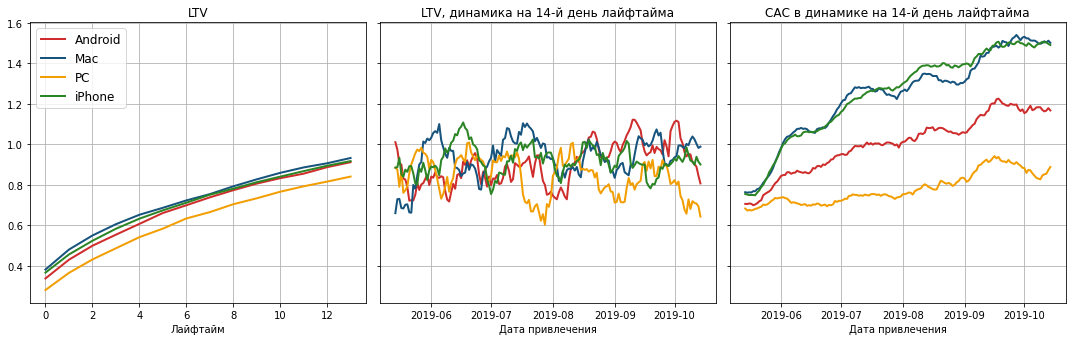

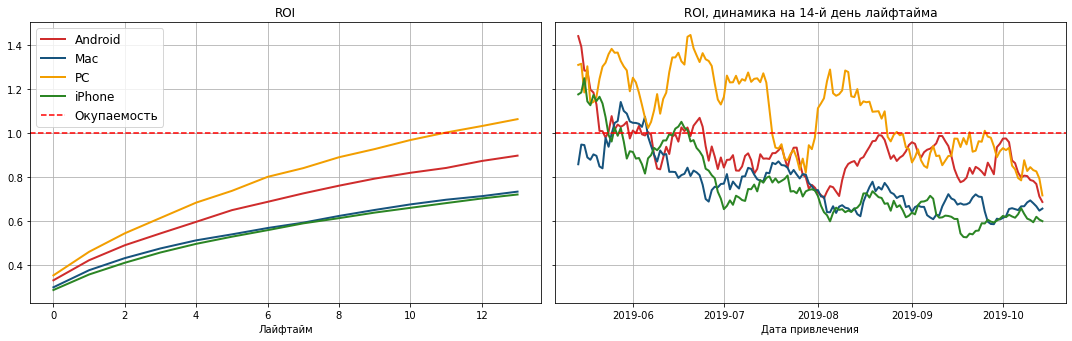

In [53]:
df_grouped, df_history = business_metrics('LTV', dimensions=['device'])
mr_plot(df_grouped, df_history)
df_grouped, df_history = business_metrics('ROI', dimensions=['device'])
mr_plot(df_grouped, df_history, window=14)

**iPhone** и **Мас**
- Линии для этих двух устройств на всех графиках идут рядом, поэтому рассмотрим их вместе. 
- Основная проблема - высокая стоимость привлечения клиента, причина которой - влияние американского рынка, где самые большие траты на рекламу и где популярность iPhone и Мас выше.
- Уровень LTV лишь слегка выше, чем у РС и Android.
- ROI не достигает уровня окупаемости. Приблизительное значение к 14-му дню лайфтайма около 0.7. Т.е. реклама для этой категории пользователей не окупается. Причина очевидно также кроится в превалировании этих устройств на рынке США.
- В динамике ROI также снижается, хотя в мае, до резкого роста расходов на рекламу, был выше уровня окупаемости.

**PC**
- LTV для пользователей PC немного ниже, чем у других групп, которые в свою очередь почти не отличаются.
- Клиенты, пользующиеся РС имеют самую низкую стоимость привлечения клиента.
- Поэтому ROI у них самая высокая, пересекает уровень окупаемости после 6-го дня лайфтама, и достигает приблизительно 1.3 к 14-му дню.
- Пик роста ROI на графике динамики в начале августа для пользователей PC обусловлен выбросом, что видно при уменьшении ширины окна сглаживания.
- Летом ROI для группы пользователей на компьютерах и ноутбуках (PC) была в целом выше, чем у всех остальных. Начиная с сентября пользователи РС и Android сравнялись. Может быть это сезонное влияние.

**Android**
- LTV растёт медленно, также как у клиентов с устройствами Apple.
- САС выше, чем у РС, но ниже, чем у iPhone и Мас.
- ROI клиентов на Android перешло границу окупаемости после 10-дня, а к 14-му дню лайфтайма окупилось приблизительно на 110%.
- Начиная с мая также как и у всех остальных устройств, ROI падает, что связано с ростом трат на рекламу, а после июля держится на уровне окупаемости.

#### Конверсия и удержание по устройствам

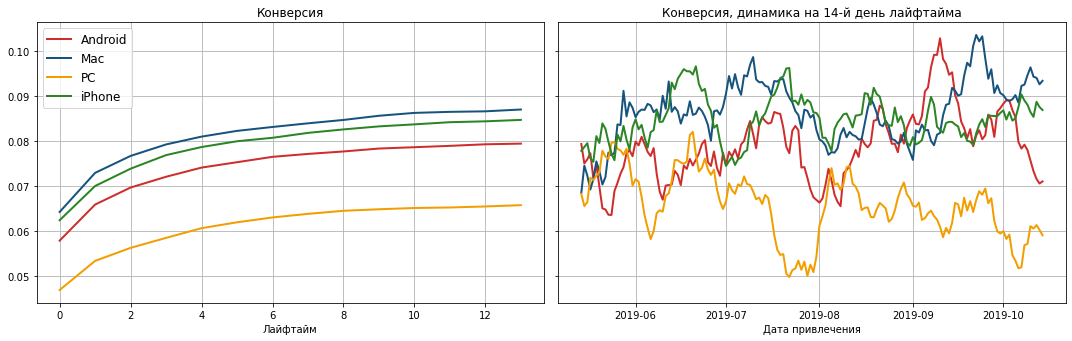

In [54]:
df_grouped, df_history = business_metrics('CR', dimensions=['device'])
mr_plot(df_grouped, df_history, window=14)

- Конверсия **iPhone** и **Мас** выше, чем у остальных, но повторяет общую тенденцию - растёт в первые дни немного, а потом держится на постоянном уровне. В динамике конверсия пользователей всё же растёт, хотя и незначительно. 
- Конверсия пользователей стационарных устройств **РС** гораздо ниже, чем у всех остальных. Вряд ли дело в отличии интерфейса или контента для PC от остальных устройств. Скорее всего, дело в самих пользователях. Для установки развлекательных приложений подавляющее большинство использует мобильные устройства. 
- Колебания графиков динамики **Android** и РС идут "вразнобой". Скорее всего так совпали выбросы в значениях для отдельных когорт, которые при сглаживании дали подобную картину.

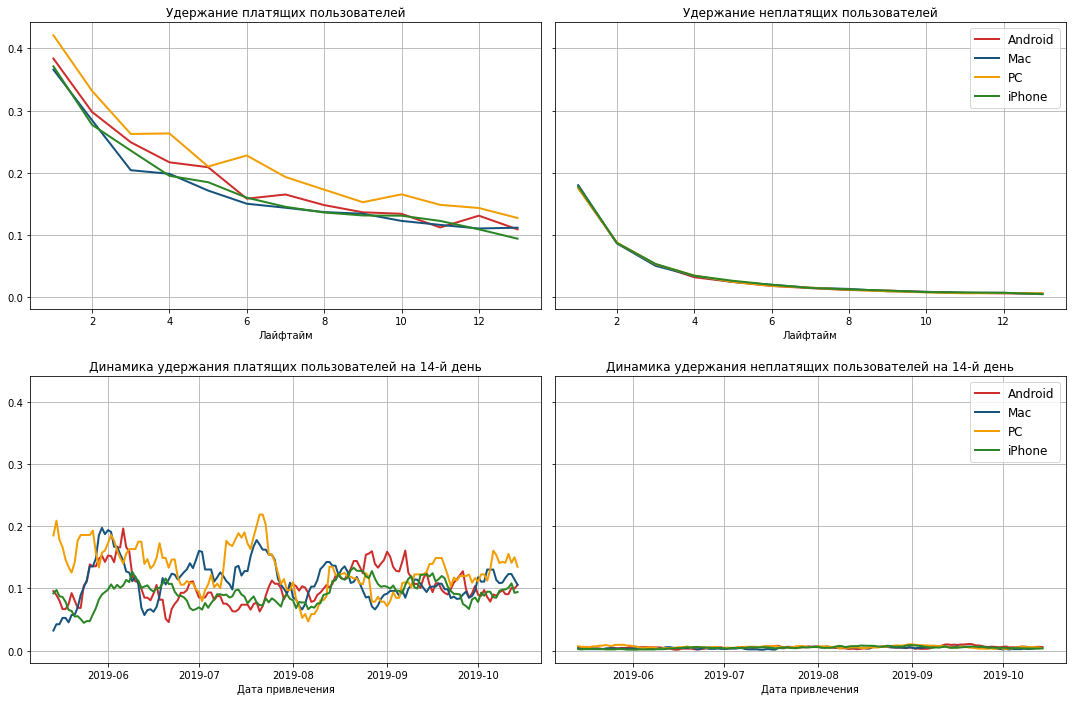

In [55]:
df_grouped, df_history = business_metrics('RR', dimensions=['device'])
rr_plot(df_grouped, df_history, window=14)

- Удержание пользователей PC и Android чуть выше, чем у остальных. Удержание владельцев РС в мае слегка снизилось. 
- Существенных различий в динамике не наблюдается, за исключением единичных выбросов для отдельных когорт.

### Окупаемость рекламы с разбивкой по регионам

#### LTV, CAC  и  ROI по регионам

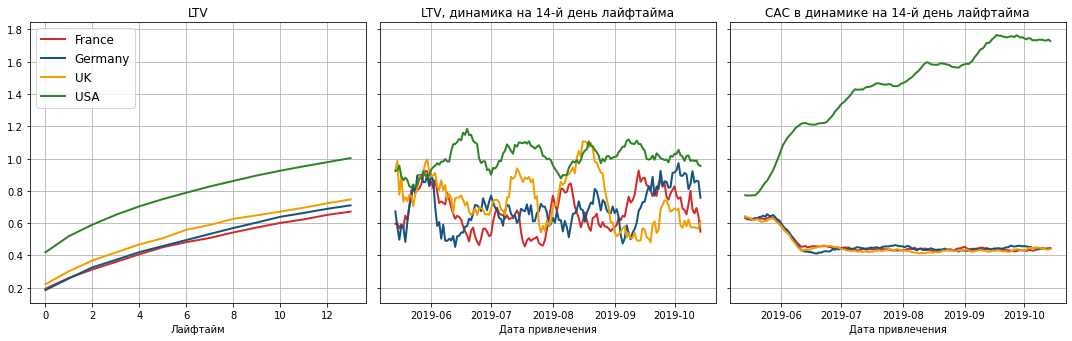

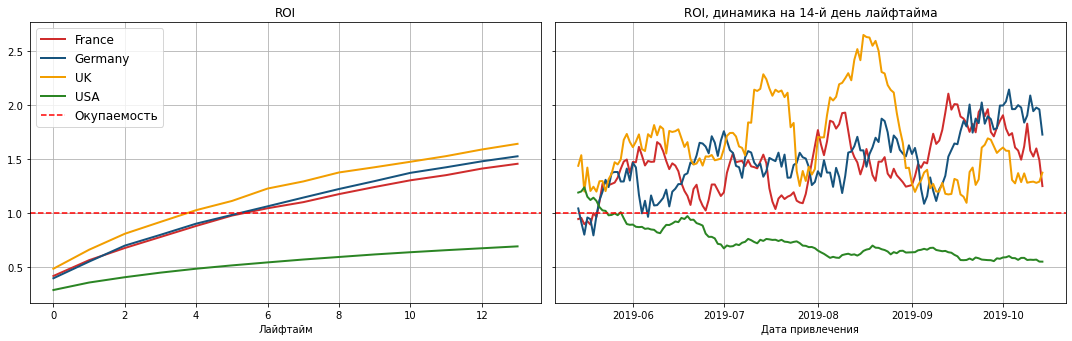

In [56]:
df_grouped, df_history = business_metrics('LTV', dimensions=['region'])
mr_plot(df_grouped, df_history)
df_grouped, df_history = business_metrics('ROI', dimensions=['region'])
mr_plot(df_grouped, df_history)

**США**
- О ситуации с большими расходами на рекламные кампании американских каналов, уже ясно. 
- LTV в США, немного выше, но не настолько, чтобы сдержать рост стоимости привлечения клиента.
- Об этом же свидетельствует низкое значение метрики ROI для США. Затраты на рекламу в этой стране оказались убыточными. А за счёт того, что американских пользователей больше (67% от всего количества), то и общие показатели ROI для всех стран сильно снизились. 

**Великобритания**, **Германия**, **Франция**
- их графики мало отличаются друг от друга и располагаются в том же порядке - значения LTV и ROI совсем немного выше для Великобритании. 
- LTV пользователей из этих стран ниже, чем этот показатель в США.
- Стоимость привлечения клиента в европейских странах очень стабильна и в среднем составляет приблизительно 0.3 долл., что является очень хорошим показателем. 
- ROI европейских стран превысил уровень окупаемости почти в 2 раза за две недели. 
- в динамике эта метрика также стабильна. Затраты для каждой когорты окупаются как минимум в полтора раза.
- На графике динамики ROI Великобритании видны треугольные пики. Если сильно уменьшить сглаживание, то видно, что это всего лишь аномально высокие значения для нескольких дней. 

#### Конверсия и удержание по регионам

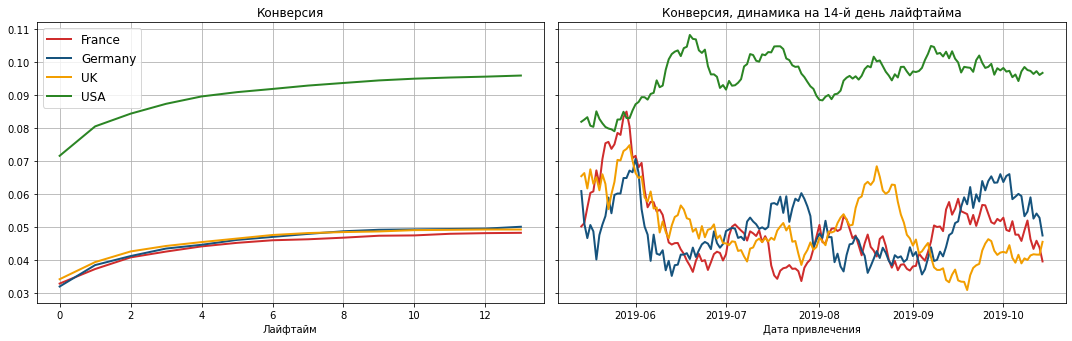

In [57]:
df_grouped, df_history = business_metrics('CR', dimensions=['region'])
mr_plot(df_grouped, df_history)

- Коэффициент конверсии пользователей из **США**  более чем в два раза выше, чем у клиентов из **Европы**. Однако и здесь конверсия растёт исключительно в первые дни, а затем уже не меняется.
- На графике динамики конверсии заметен тот самый скачок в конце мая - начале июня, который виден и на общем графике. После чего конверсия колеблется в районе значения в 7%, т.е. в среднем около 7% всех посетителей сайта из США становятся покупателями.

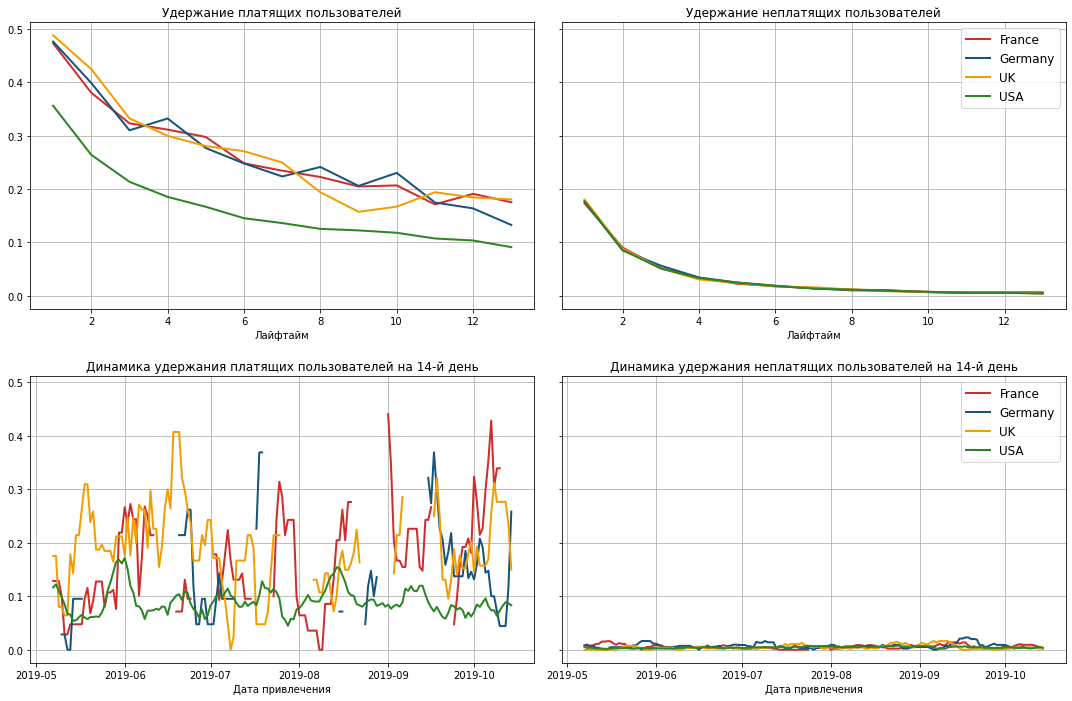

In [58]:
df_grouped, df_history = business_metrics('RR', dimensions=['region'])
rr_plot(df_grouped, df_history, window=7)

- Крайне низкое удержание пользователей из **США**. Т.е. клиентов много, они готовы вкладываться в продукт. Приобретают приложение и больше не возвращаются. Динамика удержания на 14-й день лайфтайма стабильна и варьируется в районе 10%. Т.е. к концу второй недели только 10% пользователей возвращаются в приложение. 
- Метрики и их динамика для пользователей из **Германии, Великобритании и Франции** похожи. Если и есть между ними отличия, то они незначительны.

### Окупаемость рекламы с разбивкой по каналам рекламы

Так как каналов рекламы ровно 10, они плохо умещаются на графике, рассмотрим отдельно - каналы из Европы и США.

#### LTV, CAC и ROI  по каналам рекламы

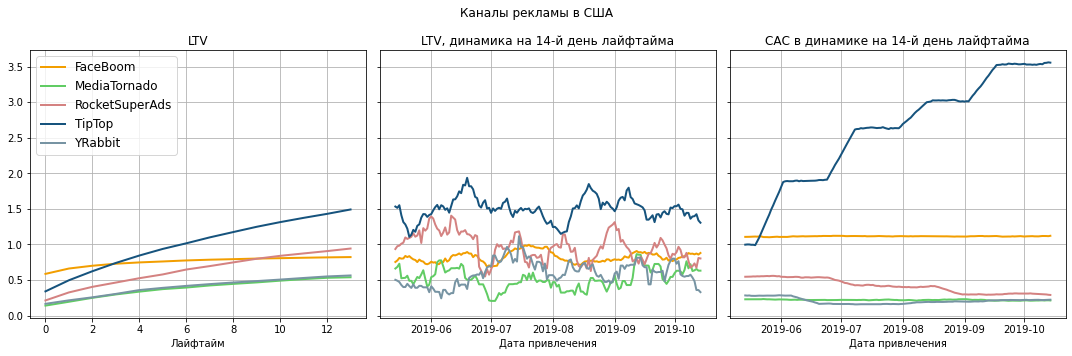

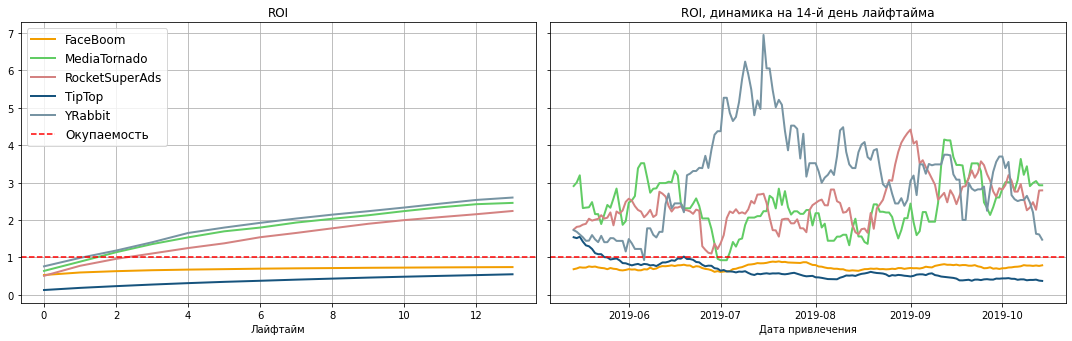

In [59]:
df_grouped, df_history = business_metrics('LTV',  dimensions=['channel'],
            prof=profiles.query('region=="USA"'))
mr_plot(df_grouped, df_history, title='Каналы рекламы в США', window=14)
df_grouped, df_history = business_metrics('ROI',  dimensions=['channel'],
            prof=profiles.query('region=="USA"'))
mr_plot(df_grouped, df_history, window=14)

**TipTop**
- У компании TipTop огромные расходы на рекламу. На графике динамики САС, особенно при уменьшении ширины окна сглаживания видно, что рост цен этого крупного поставщика пользователей для нашего приложения носит скачкообразный характер, т.е. цены на их услуги возрастали каждый месяц. И как уже не раз было замечено, отследить и хотя бы начать исправлять это можно было еще в июле-августе.
- Есть один незначительный плюс для этого канала - он имеет самые высокие значения LTV, что означает неплохую ценность таких клиентов.
- Как следствие роста САС - ROI у TipTop самый низкий, такая реклама не только не окупается, но еще и отправила в минус всех сразу.

**FaceBoom**
- Стоимость привлечения одного пользователя, пришедшего из канала FaceBoom имеет почти постоянное значение чуть выше 1 доллара, т.е. график стабилен. А так как 20% всех пользователей - посетители этого источника рекламы, то следует попытаться увеличить конверсию и удержание для этих клиентов, чтобы вывести канал из разряда убыточных.
- LTV клиентов FaceBoom ниже, чем у TipTop и RocketSuperAds и растёт медленно, т.е такие клиенты имеют меньшую ценность. Но если попытаться увеличить их конверсию, то ситуацию можно выправить.


**RocketSuperAds**, **YRabbit** и **MediaTornado**
- Три оставшихся компании имеют похожие значения всех метрик и привлекли по 3% от всех клиентов. Т.е эти группы немногочисленные. 
- Все три окупаются более чем в 2 раза за 2 недели.
- Они имеют стабильную и низкую САС
- Огромный скачок значений ROI в канале YRabbit обусловлено выбросом - аномально большим значением в одной из когорт. Это можно проверить, уменьшив ширину окна сглаживания.


Самым перспективным каналом из этих трёх, как мне кажется, является **RocketSuperAds** по следующим причинам:
- LTV пользователей этого канала выше, чем у двух оставшихся. К 14-му дню лайфтайма значение коэффициента LTV приближается к 1 доллару, и слегка превышает ценность клиентов FaceBoom. 
- САС немного снизился с мая. И если среднее значение стоимости привлечения клиента RocketSuperAds за весь период около 0.4, то к настоящему времени (имеется ввиду ноябрь 2019) это значение приблизительно 0.3 долл.
- ROI в среднем было ниже, чем у YRabbit или MediaTornado, но в динамике это значение более стабильно и похоже имеет тенденцию к росту. Тогда как у YRabbit, например, снижается.

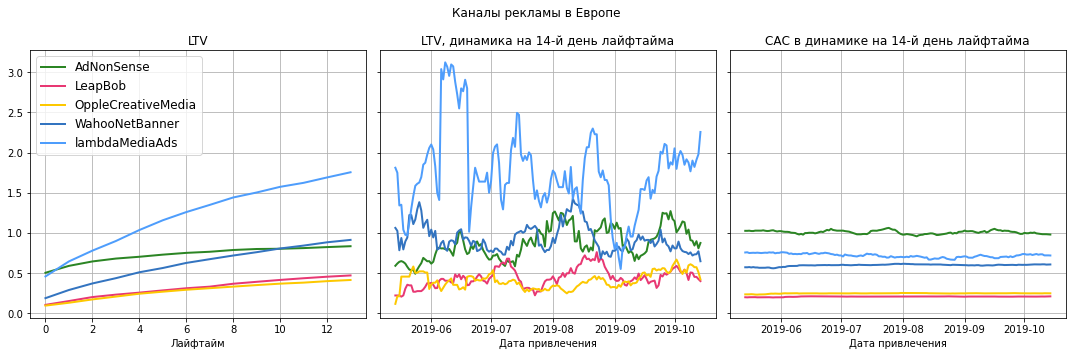

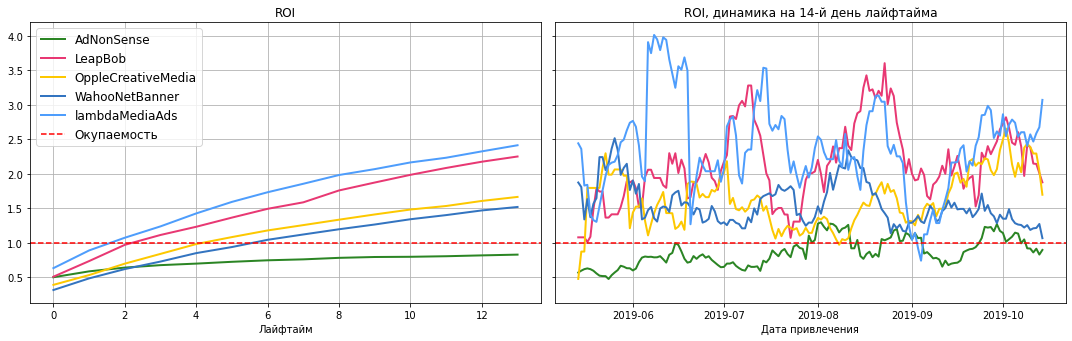

In [60]:
df_grouped, df_history = business_metrics('LTV', dimensions=['channel'],
            prof=profiles.query('region!="USA"'))
mr_plot(df_grouped, df_history, title='Каналы рекламы в Европе', window=14)
df_grouped, df_history = business_metrics('ROI', dimensions=['channel'],
            prof=profiles.query('region!="USA"'))
mr_plot(df_grouped, df_history, window=14)

Расположим пять европейских источников рекламы по убыванию значений ROI:

**lambdaMediaAds**
- к 14-му дню лайфтайма значение LTV приближается к 1.8 долл - это самые ценные клиенты для нашего приложения. Жаль только, что количество пользователей, привлеченных этим каналом среди всех посетителей сайта занимают только 1.5%. 
- Сильный скачок LTV и ROI на графиках динамики в июне относится к выбросу, что можно отследить, уменьшив ширину окна сглаживания.
- График САС стабильный, средняя стоимость привлечения клиента составляет 0.72 долл. 
- За 2 недели затраты на рекламу на канале lambdaMediaAds окупаются в 2.5 раза. 
- Динамика ROI не стабильна, присутствуют как аномально высокие, так и низкие значения этого коэффициента для разных когорт.
- Возможно, этот канал привлечения пользователей можно считать перспективным, но настораживает маленький процент клиентов и нестабильность значений. Т.е. возможно несколько особо активных клиентов, с которыми просто повезло, благодаря частым покупкам на большие суммы при среднем чеке в 5 долларов искажают все показатели. От этого возникают и такие высокие пиковые значения на графиках, а LTV и ROI заметно увеличиваются. Плюс к этому стоимость привлечения клиентов не самая низкая.

**LeapBob**
- Сочетание коэффициентов LTV и САС в целом похоже на значения этих метрик для OppleCreativeMedia
- А вот ROI получилось выше. И уже на 10-й день лайфтайма уровень окупаемости превышен в 2 раза.
- В отличие от lambdaMediaAds динамика ROI более стабильна
- Самый ценный показатель этого источника - самый низкий уровень стоимости привлечения не только в Европе, но и во по сравнению с каналами США. На одного клиента тратится всего 0.21 долл.

**OppleCreativeMedia**
- LTV на 14-й день один из самых низких для европейских каналов, приблизительно 0.5долл.
- Но и стоимость привлечения низкая и стабильная 0.25долл. 
- Окупаемость рекламы на канале OppleCreativeMedia немного выше, чем у WahooNetBanner.
- Динамика ROI показывает небольшую склонность к росту в последний месяц.

**WahooNetBanner**
- LTV на 14-й день лайфтайма близок к 0.9 долл.
- Среднее значение САС составляет 0.6 долл.
- ROI превышает уровень окупаемости к 14-му дню лайфтайма в полтора раза.
- динамика ROI более стабильна, чем у lambdaMediaAds, но не настолько высокая. 

**AdNonSense**
- Коэффициент LTV этого канала средний по Европе, но практически не растёт в зависимости от лайфтайма.
- Пользователи AdNonSense имеют самую высокую в Европе стоимость привлечения пользователей 1 долл
- Поэтому ROI у AdNonSense ниже всех в Европе и это единственный канал здесь, который не окупается. У всех остальных уровень окупаемости к 14-му дню лайфтайма превышен как минимум в полтора раза.

#### Конверсия и удержание по каналам рекламы

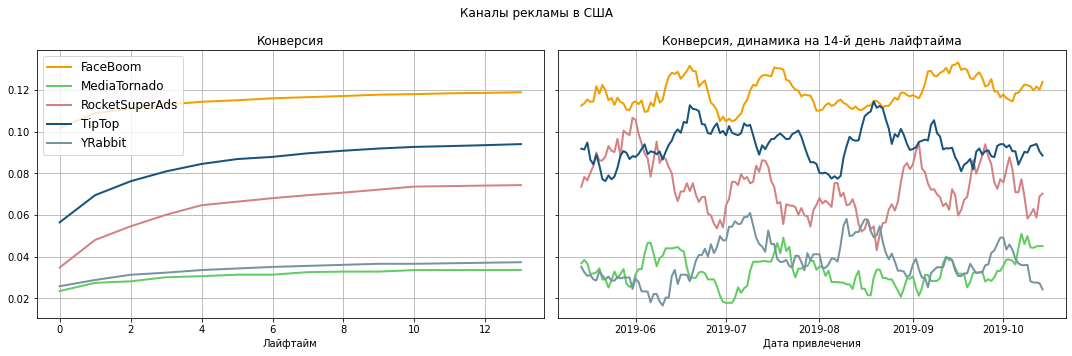

In [61]:
df_grouped, df_history = business_metrics('CR', 
            prof=profiles.query('region=="USA"'), dimensions=['channel'])
mr_plot(df_grouped, df_history, title='Каналы рекламы в США', window=14)

- Самую высокую конверсию пользователей среди рекламных каналов США имеет **FaceBoom**. 12% посетителей, перешедших на наш сайт из этого канала конвертируются в покупателями. 
- Эта метрика для **TipTop** составляет более 9%. Если удастся сократить расходы, не потеряв клиентов, попытаться нарастить удержание, то можно значительно повысить окупаемость. Тем более что TipTop приносит 32% из всех доходов.
- Третьим источником рекламы с неплохим коэффициентом конверсии является **RocketSuperAds**. Возможно, что увеличение конверсии в мае для этого канала дало тот самый скачок значений конверсии на общих графиках.
- **YRabbit** и **MediaTornado** заняли последние места в "рейтинге по конверсии", которая не превышает 4%. 

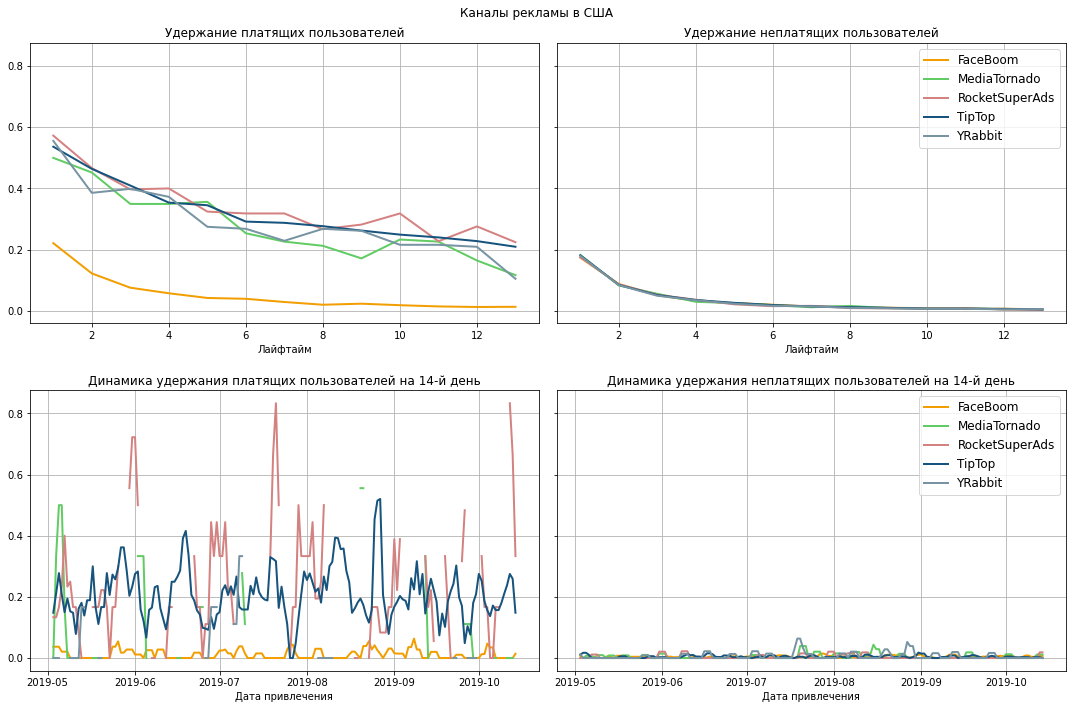

In [66]:
df_grouped, df_history = business_metrics('RR', 
            prof=profiles.query('region=="USA"'), dimensions=['channel'])
mr_plot(df_grouped, df_history, title='Каналы рекламы в США', window=3)

- Как мы уже выяснили, удержание пользователей, пришедших с рекламных каналов США крайне низкое. 
- Но для пользователей **FaceBoom** оно ещё ниже:)). Учитывая стабильность САС, неплохую конверсию и большое количество пользователей FaceBoom (19% от всех посетителей сайта), надо попытаться изменить эту ситуацию. 
- Удержание пользователей, пришедших с остальных каналов значительно выше. Так, на 14-й день лайфтайма около 20% клиентов из **TipTop** и **RocketSuperAds** возвращается в приложение. 

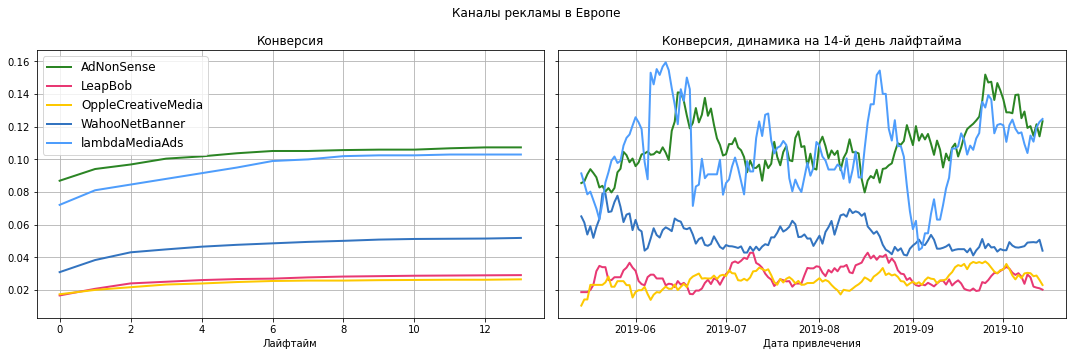

In [63]:
df_grouped, df_history = business_metrics('CR', dimensions=['channel'],
            prof=profiles.query('region!="USA"'))
mr_plot(df_grouped, df_history, title='Каналы рекламы в Европе', window=14)

- В первый же день на сайте от 8 до 10 % пользователей, пришедших с каналов рекламы **AdNonSens** и **lambdaMediaAds** становятся покупателями и это самые высокие значения из этой пятёрки.
- Резкий скачок в июне на графике динамики конверсии lambdaMediaAds "нарисовали" те же выбросы, как для ROI. И также нестабилен график динамики - очень много скачков от больших значений к низким.
- Коэффициент конверсии пользователей с канала **WahooNetBanner** ниже среднего и имеет тенденцию к снижению в последнее время.
- **LeapBob** и **OppleCreativeMedia**. Здесь кривая конверсии замерла на самой низкой для всех каналов отметке всего лишь в 3%

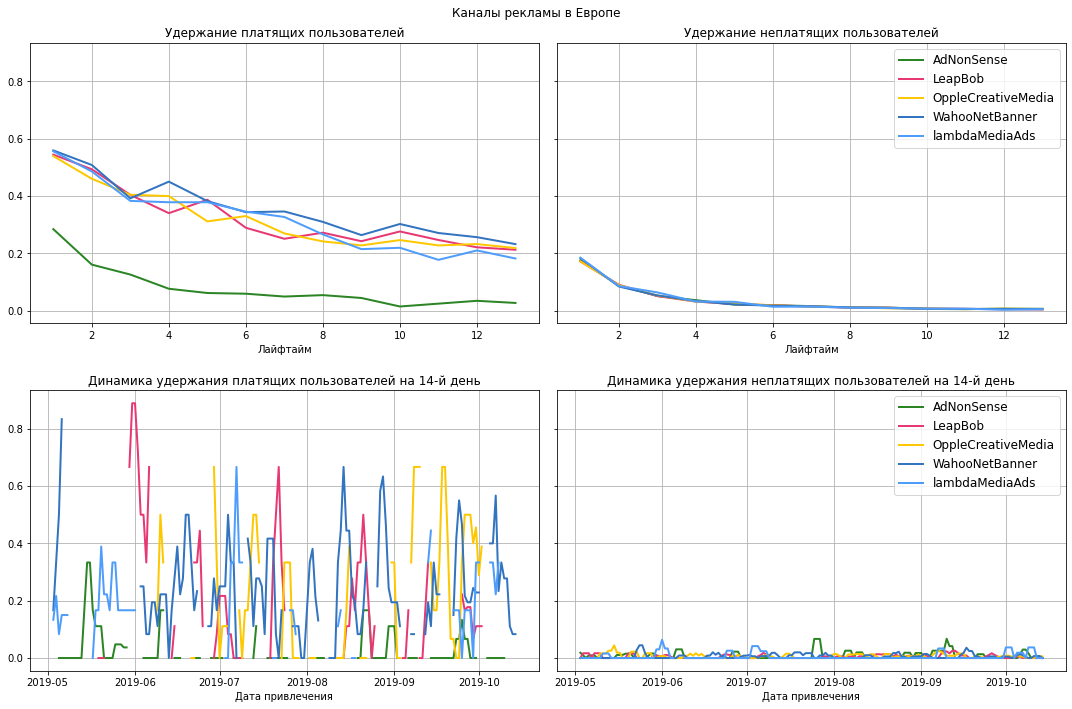

In [64]:
df_grouped, df_history = business_metrics('RR', 
            prof=profiles.query('region!="USA"'), dimensions=['channel'])
mr_plot(df_grouped, df_history, title='Каналы рекламы в Европе', window=3)

- Самый низкий коэффициент удержания имеют пользователи, привлеченные каналом **AdNonSense**. Уже на 10-й день лайтайма количество повторных посетителей почти нулевое.
- Эта метрика для остальных источников рекламы через 2 недели составляет около 20%. 

### Итоги анализа окупаемости

Проанализировав все данные, имеем следующее:

1. В целом приложение не окупается (ROI c трудом достигает уровня окупаемости за 2 недели). Учитывая, что имеются и другие расходы, компания действительно терпит убытки. 
2. Затраты на рекламу в Европе полностью окупаются, стоит сохранить и усилить эту тенденцию. 
2. Рост стоимости привлечения клиентов в США и как следствие - уменьшение ROI можно было заметить гораздо раньше.
3. Динамика LTV подтверждает необходимость увеличения удержания, чтобы увеличить число повторных покупок.
4. Конверсия пользователя в покупатели происходит только в первые дни. А в динамике коэффициент конверсии не увеличивается. 
5. Удержание имеет низкие значения по всем группам. 
6. Сильного влияния типа используемого пользователем устройства не замечено. Доли групп пользователей в разбивке по типу устройства не зависят от платящих или неплатящих пользователей А зависят только от региона. Поэтому на значения метрик для iPhone и Мас оказывают влияние показатели США, так как эти устройства там наиболее популярны. 

<h2 style="color:navy">Общие выводы</h2> 

### Вероятные причины убытков

#### Для всех каналов рекламы

1. Отсутствие своевременного *отслеживания метрик* в динамике. 
- Так, например, сильное увеличение расходов, падение окупаемости и практически отсутствующее удержание клиентов из США можно было заметить ещё три месяца назад или даже раньше.

2. За счет того, что *большую часть посетителей сайта составляют пользователи из США*, ухудшение окупаемости каналов рекламы этой страны привело к убыточности приложения по всем странам. При том, что затраты на рекламу в европейских странах окупаются в 2 раза за две недели.


3. *Низкий коэффициент удержания пользователей из США*. В среднем 7% посетителей этой страны делают заказ на сайте в первые дни.  А к концу второй недели только 10% из них возвращаются в приложение. Т.е. менее 1% от изначального количества. Прямым следствием низкого удержания является почти полное *отстутсвие повторных покупок*.


4. Конверсия всех групп пользователей происходит только в первые дни. Т.е. клиенты, впервые попав на сайт и не сделав заказ, больше не возвращаются.

#### В разбивке по каналам

1. **TipTop**. 
- *Слишком высокие расходы на рекламу*. Цены на рекламу на канале TipTop увеличивались ежемесячно начиная с июня. Как следствие роста САС - реклама на TipTop не только не окупается, но еще и отправила в минус всех сразу.
- Но у этого канала есть свои плюсы - он имеет самые высокие значения LTV, т.е. клиенты, привлеченные этим каналом, приносят в среднем неплохие доходы (32% от всех доходов), а конверсия составляет 9%.

2. **FaceBoom**
- Реклама на этом канале не окупается.
- У пользователей, привлеченных каналом рекламы FaceBoom *коэффициент удержания* через 2 недели близок к нулю. Учитывая, что эта группа составляет 19% от всех посетителей сайта или почти третью часть из США, то именно за счёт FaceBoom общее значение удержания для всей страны стало низким. 
- Так как стоимость привлечения клиента на этом канале стабильна (в среднем и не сильно превосходит значение LTV), а конверсия достигает 12%, то увеличение удержания и вовлечение пользователей этой группы в повторные покупки, может вывести канал из убыточных. 

3. **AdNonSense**
- Пользователи AdNonSense составляют всего лишь 2% от всех посетителей сайта. На общую ситуацию они не влияют, но этот канал рекламы - единственный из европейских, не приносящий прибыли. 
- Причины почти те же, что и у FaceBoom - самая высокая средняя стоимость привлечения клиента (1 долл.) и самый низкий коэффициент удержания имеют (уже на 10-й день клиенты практически не возвращаются). 

### Рекомендации


1. Организовать регулярный **анализ маркетинга**. 
    - Следует отслеживать все бизнес-показатели в динамике на регулярной основе не реже чем раз в 2 недели (период окупаемости), вовремя замечая любые изменения и тенденции. 
    - Создать воронку продаж, чтобы изучать не только визит пользователя на сайт, но и все остальные действия и события.
    - Каждое нововведение и изменение тщательно анализировать и тестировать.


2. Требуется как можно сильнее **сократить расходы** на рекламу компании **TipTop**, постаравшись не потерять в количестве пользователей, привлекаемых этим каналом:
    - изменить тип оплаты рекламы на этом канале
    - или тип самой рекламы, использовав более дешевые варианты;
    - найти возможность скидки или какую-то партнёрскую программу для этого канала, чтобы пользователи остались те же, а цена на рекламу снизилась


3. Разработать методы **увеличения удержание пользователей**, чтобы в свою очередь росло количество повторных покупок. 
- При увеличении значений этой метрики есть шансы достигнуть окупаемости рекламы на канале **FaceBoom**.

- Возможные методы увеличения количества повторыных посещений сайта:
    - после создания воронки продаж отслеживать не только факт оплаты, но и все шаги посетителей, чтобы определить в какой момент или по какой причине пользователи не хотят совершать повторные покупки или теряют интерес к приложению;
    - персонифицировать общение с клиентами - использовать рассылку, рекомендации, напоминания;
    - проверить удобство и навигацию приложения;
    - разнообразить контент приложения и рекламных объявлений;
    - проверить соответствие контента ожиданиям целевой аудитории, особенно для пользователей, привлеченных каналами с большим притоком посетителей, но низким уровнем удержания, например FaceBoom;
    
    
4. **Перенаправить часть средств**, затрачиваемых на убыточные рекламные каналы США в более надёжные каналы, тем самым достигнув равновесия, чтобы не было превалирующих лидеров. 
- В этих целях можно рекомендовать:
    - **LeapBob**, реклама окупается в 2 раза за 10 дней лайфтайма. Доля посетителей с этого канала среди всех посетителей составляет 6%, а стоимость привлечения самая низкая среди всех каналов. Уровень конверсии низкий, но поработав над улучшениями на сайте, это можно исправить.
    - **lambdaMediaAds** можно тоже учесть, но с осторожностью. Доля посетителей на нашем сайте всего 1.5%, стоимость привлечения высокая по сравнению с другими источниками Европы, а метрики этого канала ведут себя нестабильно.
- Перспективной может также являться:
    - **RocketSuperAds**, привлекающая 3% наших посетителей и имеющая низкое значение САС и окупаемость в 2 раза за 2 недели.
- Можно также рассмотреть отказ от размещения объявлений на канале **AdNonSense**, так как доля посетителей из этого канала низкая, а уровень САС самый высокий в Европе
    
    
5. Способы **увеличить конверсию**:
    - проверить контент и привлекательность рекламных объявлений. Здесь в качестве примера можно использовать рекламу на каналах с хорошей конверсией. Например, FaceBooм. Хотя это и убыточный канал, но привлекает много пользователей;
    - улучшить посадочную страницу, нацелить её на определенную аудиторию. Создав, например разные страницы для пользователей из разных каналов;
    - удержать дольше неплативших посетителей, предлагая пробную версию приложения (это лучше делать после увеличения удержания для всех пользователей) или рассмотреть возможность скидок. Также этого можно достичь разнообразием контента;
    - проверять какое влияние на конверсию оказывают изменения на сайте и в приложении;
    - выяснить причину роста конверсии в начале июня для одного из рекламных каналов США (скорее всего, RocketSuperAds). Проверить были ли изменения в баннерах и объявлениях в мае-июне. Если да, то учесть этот опыт, как положительный и использовать похожие методы для увеличения конверсии.
    
    
6. Всё таки не забывать про **органических пользователей**, а это 38% посетителей, которые приносят 21% доходов в нашем приложении, но обходятся бесплатно. Улучшая сайт и рекламу (объявления, баннеры), эту группу следует также учитывать и анализировать с помощью той же воронки продаж.